# **Driver Alertness Detection**
## **By: Arsh Vohra**

<img src ="https://d2hucwwplm5rxi.cloudfront.net/wp-content/uploads/2023/03/15075844/driver-fatigue-detection-system-Cover-20230315.jpg">



## **Description:**
**The "Stay Alert" project aims to predict driver alertness using machine learning. The dataset contains physiological, environmental, and vehicular data. Three classifiers, Decision Tree, Random Forest, and XGBoost, are trained and compared. The project includes data analysis, preprocessing, model training, and evaluation. The final model can be used to predict driver alertness and enhance road safety.**

## Importing Necessary Libraries

In [1]:
import jovian
import opendatasets as od
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
sns.set_style('darkgrid')
plt.rcParams['font.size']=10
plt.rcParams['figure.dpi']=300

# **Objective and Data Description**


## **Objective:**

**The primary objective of this challenge is to develop a predictive model that can accurately assess driver alertness based on physiological, environmental, and vehicular data collected during driving sessions. The model should be capable of predicting whether a driver is alert or not, represented by binary values (1 for an alert driver, 0 for a non-alert driver).**

## **Data Description:**

**The dataset contains sequential observations, each corresponding to a unique trial ID, representing approximately 2 minutes of data recorded at 100 ms intervals during driving sessions. The data is collected from around 100 drivers of diverse genders, ages, and ethnic backgrounds. The columns in the dataset are structured as follows:**

- **Trial ID:** An identifier for each 2-minute period, grouping sequential observations from the same driving session.
- **Observation Number:** A sequentially increasing number within each trial, helping track the temporal sequence of observations.
- **Target (Hidden in Test Set):**
  - **1:** Represents an alert driver, indicating the driver is attentive and focused during the driving session.
  - **0:** Indicates a non-alert driver, suggesting the driver is not attentive or may be drowsy.
- **Physiological Data (P1 to P8):** Eight columns (P1 to P8) representing physiological measurements. The specific details and units of these measurements are undisclosed to maintain fairness and encourage models using fewer physiological variables.
- **Environmental Data (E1 to E11):** Eleven columns (E1 to E11) capturing information about the driving environment. However, the specific measurements are kept hidden.
- **Vehicular Data (V1 to V11):** Eleven columns (V1 to V11) representing vehicular data, without revealing the exact vehicular measurements.**



In [2]:
url ='https://www.kaggle.com/competitions/stayalert/data'
od.download(url)

Skipping, found downloaded files in ".\stayalert" (use force=True to force download)


In [3]:
os.listdir('.\stayalert')

['example_submission.csv', 'fordTest.csv', 'fordTrain.csv', 'Solution.csv']

In [4]:
train_df = pd.read_csv(r".\stayalert\fordTrain.csv")
train_df

TrialID  ObsNum  IsAlert       P1        P2    P3       P4        P5  \
0             0       0        0  34.7406   9.84593  1400  42.8571  0.290601   
1             0       1        0  34.4215  13.41120  1400  42.8571  0.290601   
2             0       2        0  34.3447  15.18520  1400  42.8571  0.290601   
3             0       3        0  34.3421   8.84696  1400  42.8571  0.290601   
4             0       4        0  34.3322  14.69940  1400  42.8571  0.290601   
...         ...     ...      ...      ...       ...   ...      ...       ...   
604324      510    1194        1  32.0051  10.13240   800  75.0000  0.081731   
604325      510    1195        1  32.0393  12.45040   800  75.0000  0.081731   
604326      510    1196        1  32.0762  10.06180   800  75.0000  0.081731   
604327      510    1197        1  32.1154  17.84500   800  75.0000  0.081731   
604328      510    1198        1  32.1154  17.84500   800  75.0000  0.081731   

         P6        P7  ...     V2   V3       V4  V5    V6  V7    V8  V9  V10  \
0       572  104.8950  ...  0.175  752  5.99375   0  2005   0  13.4   0    4   
1       572  104.8950  ...  0.455  752  5.99375   0  2007   0  13.4   0    4   
2       576  104.1670  ...  0.280  752  5.99375   0  2011   0  13.4   0    4   
3       576  104.1670  ...  0.070  752  5.99375   0  2015   0  13.4   0    4   
4       576  104.1670  ...  0.175  752  5.99375   0  2017   0  13.4   0    4   
...     ...       ...  ...    ...  ...      ...  ..   ...  ..   ...  ..  ...   
604324  680   88.2353  ...  0.280  240  3.01875   0  1801   0  30.4   0    4   
604325  680   88.2353  ...  0.280  240  3.01875   0  1801   0  30.4   0    4   
604326  680   88.2353  ...  0.175  240  3.01875   0  1800   0  31.3   0    4   
604327  680   88.2353  ...  0.175  240  3.01875   0  1800   0  31.3   0    4   
604328  680   88.2353  ...  0.175  240  3.01875   0  1800   0  31.3   0    4   

            V11  
0       14.8004  
1       14.7729  
2       14.7736  
3       14.7667  
4       14.7757  
...         ...  
604324  15.8113  
604325  15.8018  
604326  15.8120  
604327  15.8270  
604328  15.8270  

[604329 rows x 33 columns]

In [5]:
test_df = pd.read_csv(r'.\stayalert\fordTest.csv')
test_df

TrialID  ObsNum IsAlert       P1        P2    P3       P4        P5  \
0             0       0       ?  38.4294  10.94350  1000  60.0000  0.302277   
1             0       1       ?  38.3609  15.32120  1000  60.0000  0.302277   
2             0       2       ?  38.2342  11.51400  1000  60.0000  0.302277   
3             0       3       ?  37.9304  12.26150  1000  60.0000  0.302277   
4             0       4       ?  37.8085  12.36660  1000  60.0000  0.302277   
...         ...     ...     ...      ...       ...   ...      ...       ...   
120835       99    1206       ?  37.3798  17.40260   892  67.2646  0.131030   
120836       99    1207       ?  37.1653   5.37419   892  67.2646  0.131030   
120837       99    1208       ?  36.9131   9.26657   892  67.2646  0.131030   
120838       99    1209       ?  36.6297  10.41710   892  67.2646  0.131030   
120839       99    1210       ?  36.6297  10.41710   892  67.2646  0.131030   

         P6        P7  ...    V2   V3       V4  V5    V6  V7    V8  V9  V10  \
0       508  118.1100  ...  0.00  255  4.50625   0  2127   0  17.6   0    4   
1       508  118.1100  ...  0.00  255  4.50625   0  2127   0  17.6   0    4   
2       508  118.1100  ...  0.07  255  4.50625   0  2131   0  17.6   0    4   
3       508  118.1100  ...  0.07  255  4.50625   0  2131   0  17.6   0    4   
4       504  119.0480  ...  0.00  255  4.50625   0  2136   0  17.6   0    4   
...     ...       ...  ...   ...  ...      ...  ..   ...  ..   ...  ..  ...   
120835  752   79.7872  ... -0.07  255  0.00000   0   658   0   0.0   0    1   
120836  752   79.7872  ... -0.07  255  0.00000   0   657   0   0.0   0    1   
120837  752   79.7872  ... -0.07  255  0.00000   0   655   0   0.0   0    1   
120838  752   79.7872  ... -0.07  240  0.00000   0   657   0   0.0   0    1   
120839  752   79.7872  ... -0.07  240  0.00000   0   657   0   0.0   0    1   

            V11  
0       16.1937  
1       16.1744  
2       16.1602  
3       16.1725  
4       16.1459  
...         ...  
120835  16.6850  
120836  16.6840  
120837  16.6487  
120838  16.6314  
120839  16.6314  

[120840 rows x 33 columns]

In [6]:
submissison_df = pd.read_csv(r'.\stayalert\example_submission.csv')
submissison_df

TrialID  ObsNum  Prediction
0             0       0           0
1             0       1           0
2             0       2           0
3             0       3           0
4             0       4           0
...         ...     ...         ...
120835       99    1206           0
120836       99    1207           0
120837       99    1208           0
120838       99    1209           0
120839       99    1210           0

[120840 rows x 3 columns]

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [8]:
train_df.isna().sum()/train_df.shape[0]

TrialID    0.0
ObsNum     0.0
IsAlert    0.0
P1         0.0
P2         0.0
P3         0.0
P4         0.0
P5         0.0
P6         0.0
P7         0.0
P8         0.0
E1         0.0
E2         0.0
E3         0.0
E4         0.0
E5         0.0
E6         0.0
E7         0.0
E8         0.0
E9         0.0
E10        0.0
E11        0.0
V1         0.0
V2         0.0
V3         0.0
V4         0.0
V5         0.0
V6         0.0
V7         0.0
V8         0.0
V9         0.0
V10        0.0
V11        0.0
dtype: float64

In [9]:
def outlier(df):
    q25,q75 = np.percentile(df,25),np.percentile(df,75)
    IQR = q75 - q25
    upper = q75 + (1.5 * IQR)
    lower = q25 - (1.5 * IQR)
    out = 0
    for i in df:
        if i > upper or i < lower:
            out+=1
    print("{} Number of Outlier in {} is {}".format('\033[1m',df.name,out))
    print("{} {}% of Outliers are in {}".format('\033[1m',round(out/len(df)*100,2),df.name))
    

In [10]:
def outlier_index(df):
    q25,q75 = np.percentile(df,25),np.percentile(df,75)
    IQR = q75 - q25
    upper = q75 + (1.5 * IQR)
    lower = q25 - (1.5 * IQR)
    out = []
    for i,val in enumerate(df):
        if val > upper or val < lower:
            out.append(i)
            
    return out

# **Exploratory data analysis**

<Axes: title={'center': 'Distribution of IsAlert'}, xlabel='IsAlert', ylabel='count'>

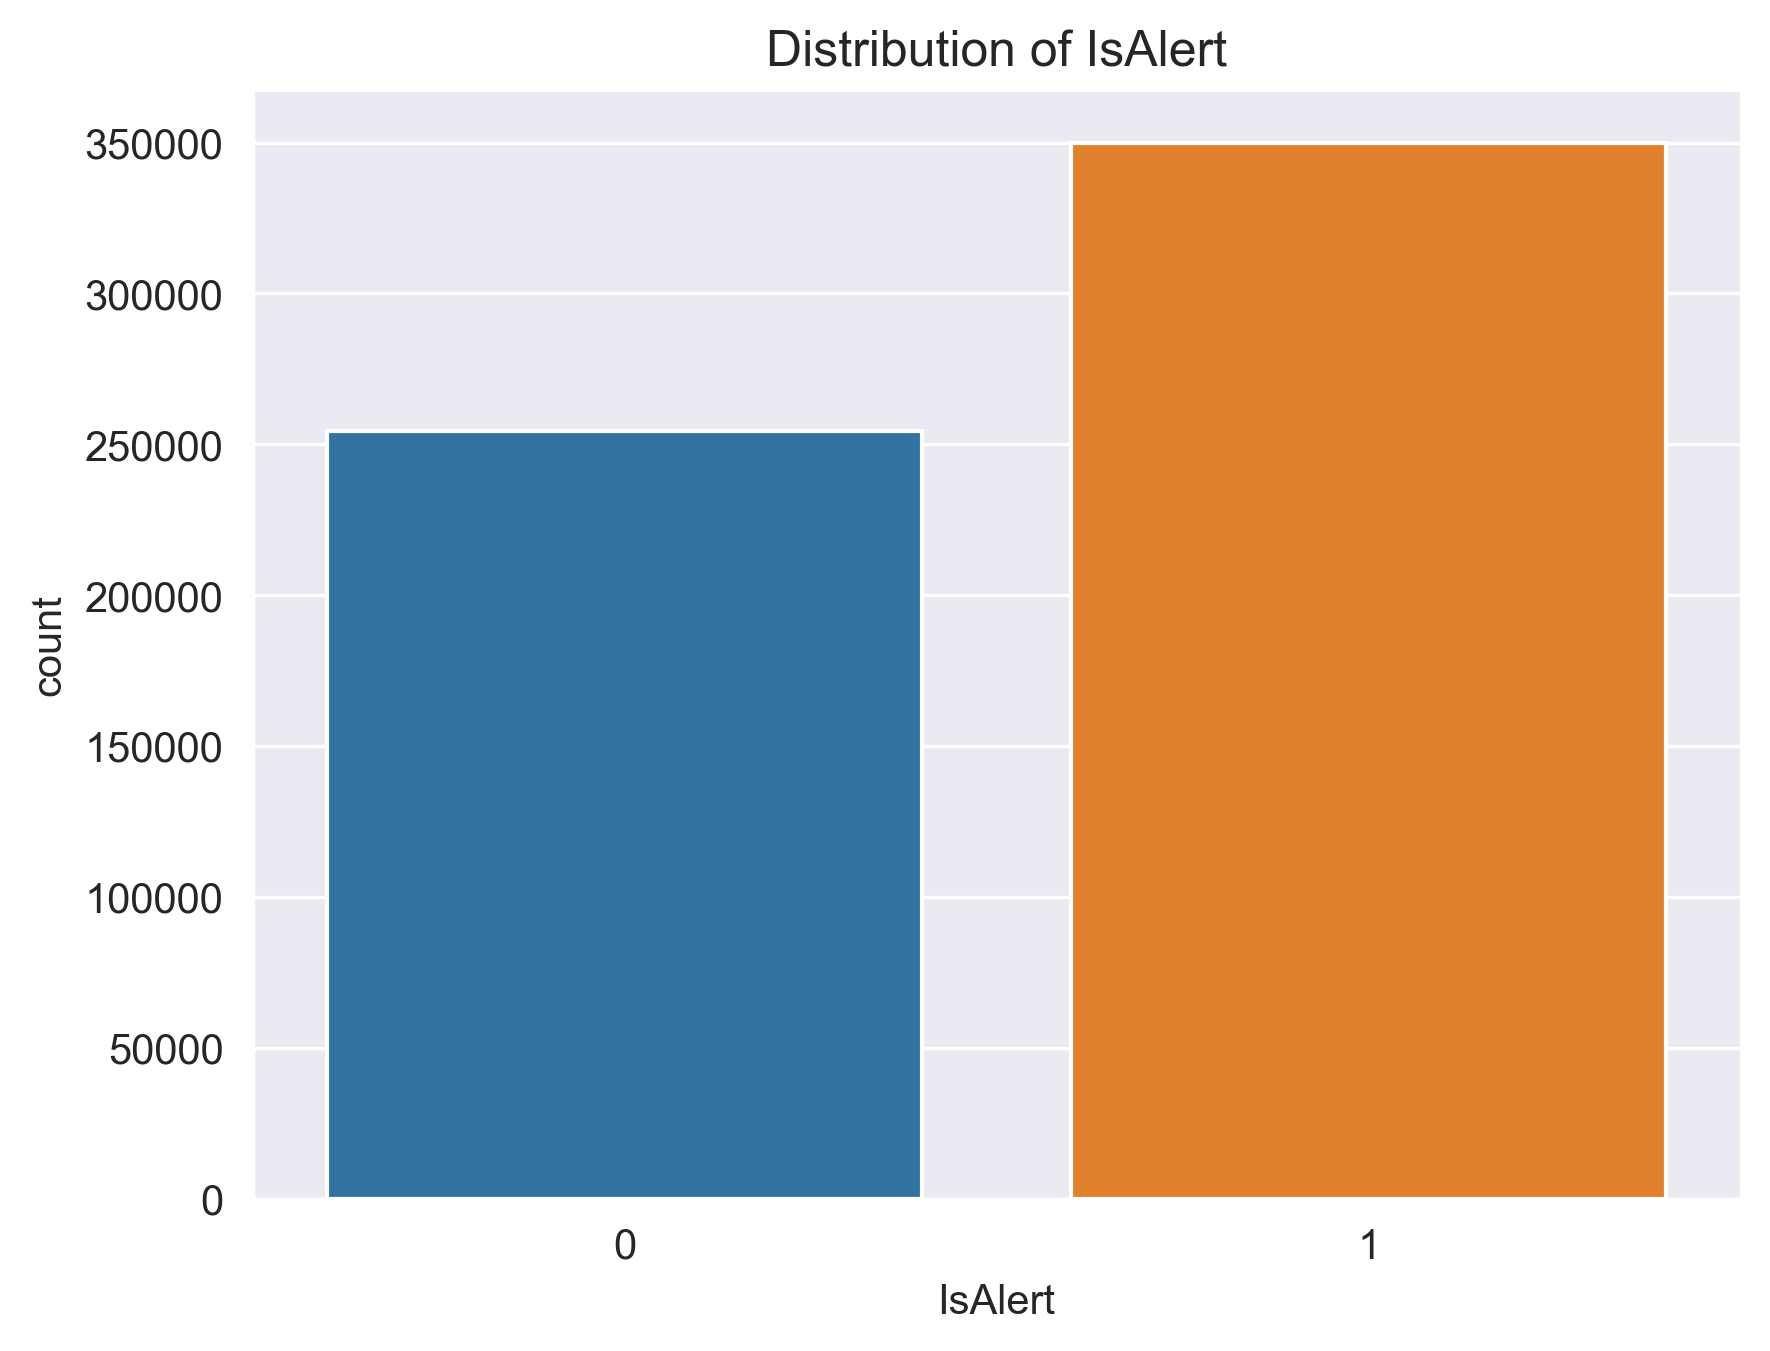

In [11]:
plt.title("Distribution of IsAlert")
sns.countplot(data=train_df,x='IsAlert')

**There is a difference between IsAlert Yes and 0 NO, but it is not significant.**

###### **P1, P2 , …….., P8  represent physiological data**

###### **E1, E2, …….., E11  represent environmental data;**

###### **V1, V2, …….., V11  represent vehicular  data;**

## Analysis of Physiological data

 Number of Outlier in P1 is 44919
 7.43% of Outliers are in P1


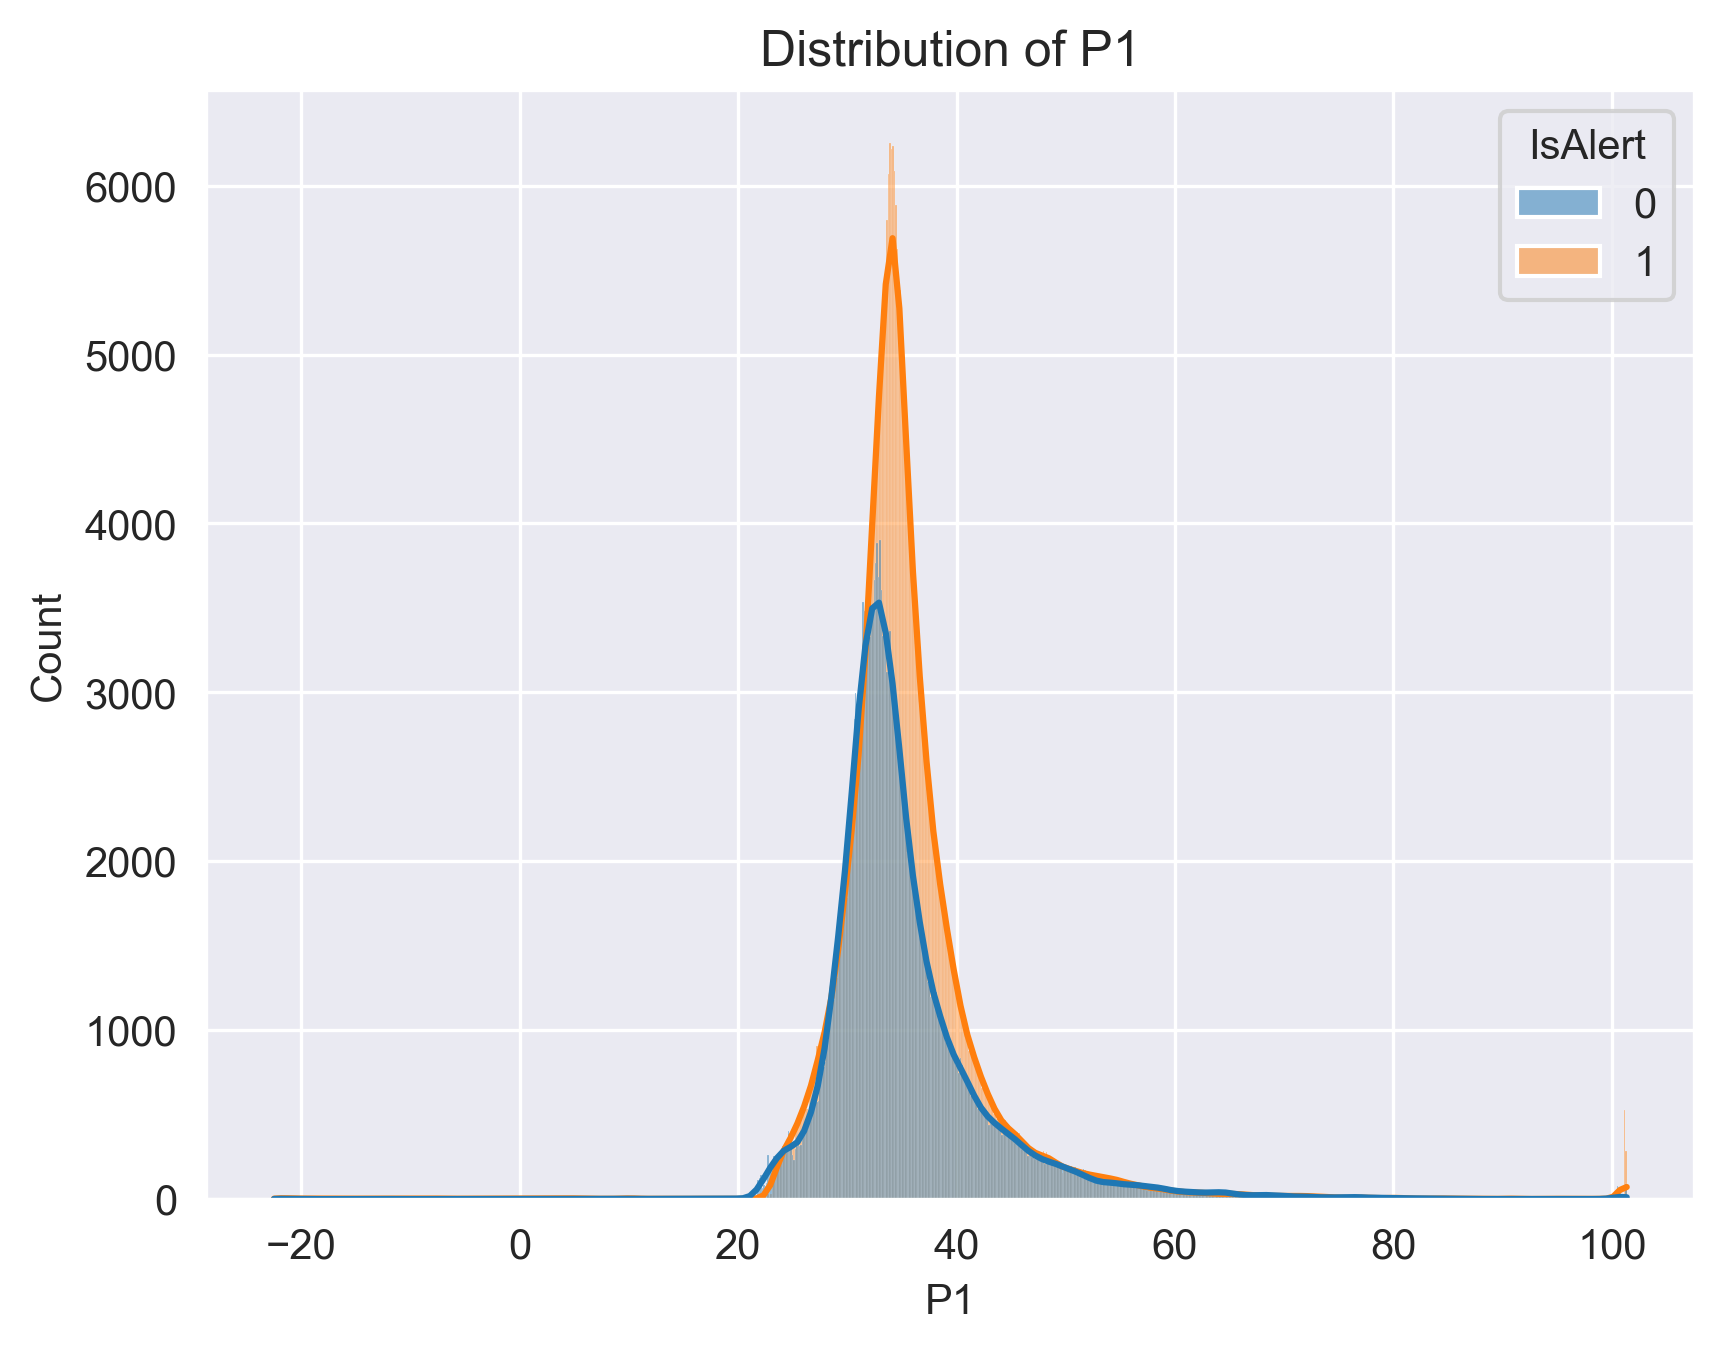

In [12]:
sns.histplot(data=train_df,x='P1',hue='IsAlert',kde=True)
plt.title("Distribution of P1")
outlier(train_df.P1)

**The P1 Distribution is quite similar to the Gussian or Normal distribution, however there is a noticeable difference depending on whether the driver is alert. 7.43% of the data are outliers.**

In [13]:
plt.title("Distribution of P2")
sns.histplot(data=train_df,x='P2',hue='IsAlert',kde=True)
outlier(train_df.P2)

 Number of Outlier in P2 is 33960
 5.62% of Outliers are in P2


**P2 distribution likewise follows a Gussian distribution, however there is less of a difference depending on whether the drive is awake or not. It contains 5.62% outliers.**

 Number of Outlier in P3 is 3975
 0.66% of Outliers are in P3


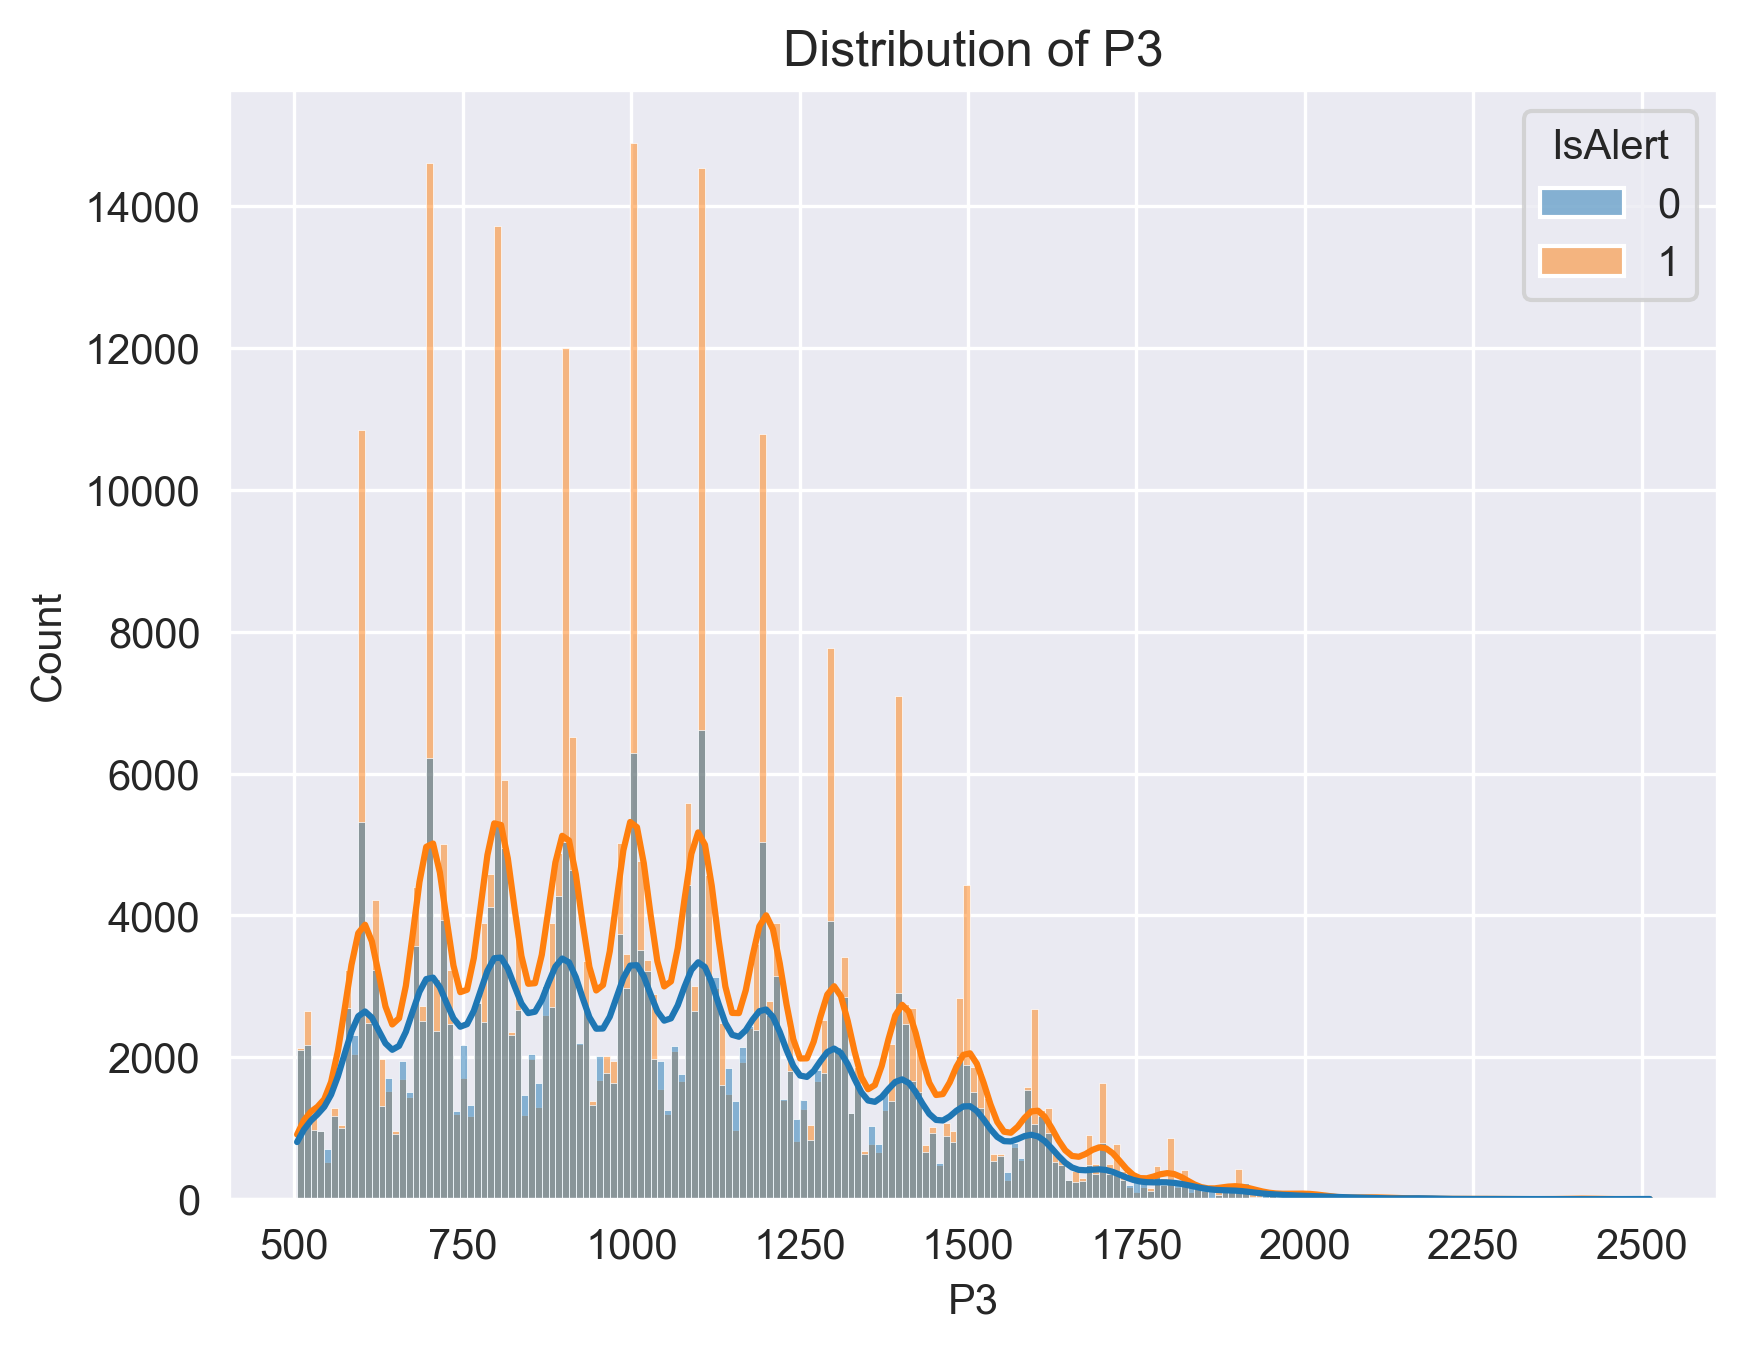

In [14]:
plt.title("Distribution of P3")
sns.histplot(data=train_df,x='P3',hue='IsAlert',kde=True)
outlier(train_df.P3)

**P3 has a little amount of right-hand skew and only up to 0.66% of outliers.**

In [15]:
plt.title("Distribution of P4")
sns.histplot(data=train_df,x='P4',hue='IsAlert',kde=True)
outlier(train_df.P4)

 Number of Outlier in P4 is 6493
 1.07% of Outliers are in P4


**Only 1.07% of the data in P4 are outliters, and the data are distributed out well with low right skew.**

In [16]:
plt.title("Distribution of P5")
sns.histplot(data=train_df,x='P5',hue='IsAlert',kde=True)
outlier(train_df.P5)

 Number of Outlier in P5 is 144127
 23.85% of Outliers are in P5


**P5 values are almost exactly zero, although there are 23.85% outliers.**

In [17]:
plt.title("Distribution of P6")
sns.histplot(data=train_df,x='P6',hue='IsAlert',kde=True)
outlier(train_df.P6)

 Number of Outlier in P6 is 8889
 1.47% of Outliers are in P6


**P6 values are similarly quite near to zero, however the outliers are comparably less than those of P5, that are 1.47%.**

In [18]:
plt.title("Distribution of P7")
sns.histplot(data=train_df,x='P7',hue='IsAlert',kde=True)
outlier(train_df.P7)

 Number of Outlier in P7 is 8835
 1.46% of Outliers are in P7


**P7 has 1.46% outliers and just marginally resembles a normal distribution.**

 Number of Outlier in P8 is 0
 0.0% of Outliers are in P8


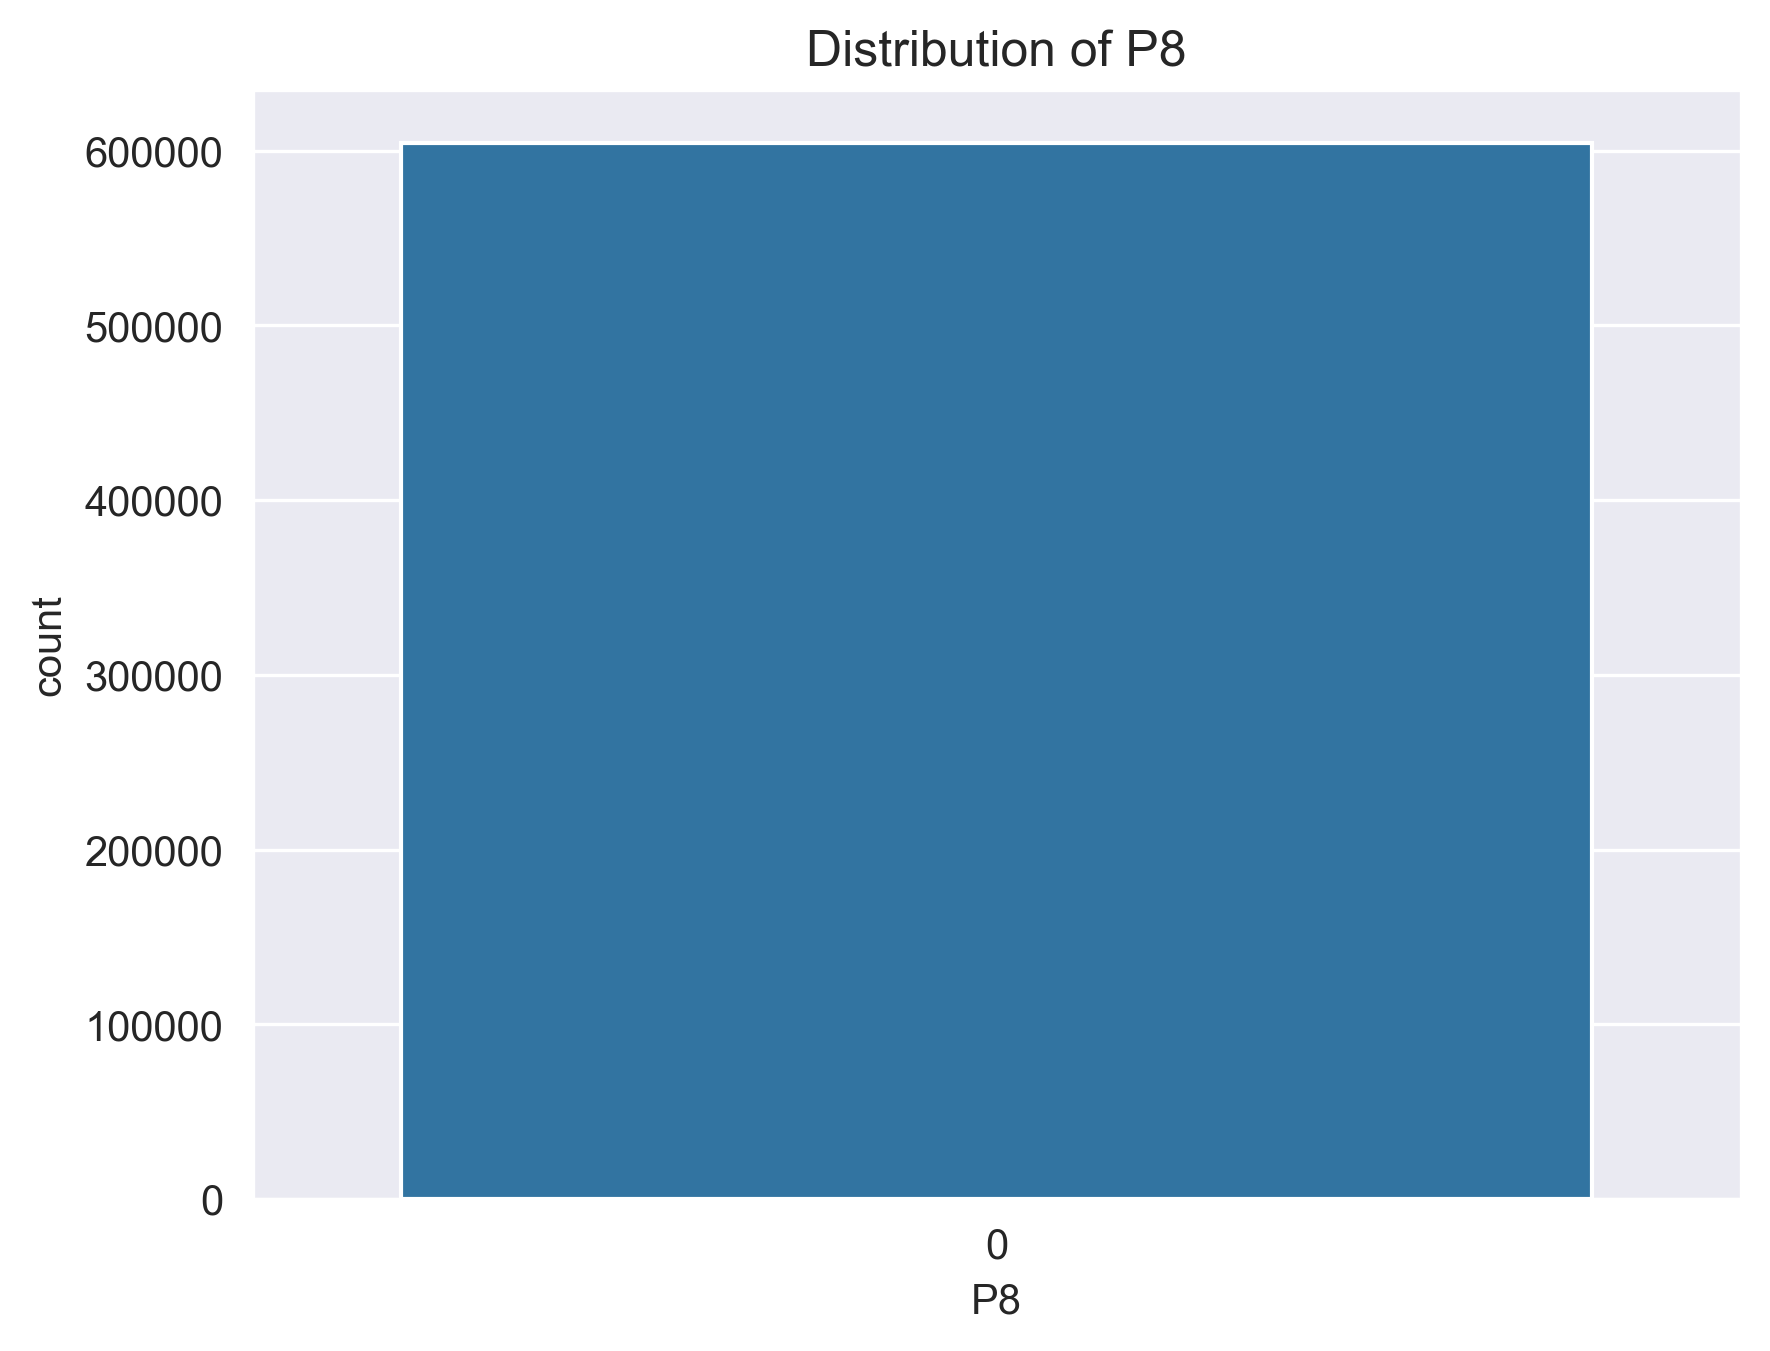

In [19]:
plt.title("Distribution of P8")
sns.countplot(data=train_df,x='P8')
outlier(train_df.P8)

**P8's values are all zero.**

## Analysis of Environmental data

 Number of Outlier in E1 is 48
 0.01% of Outliers are in E1


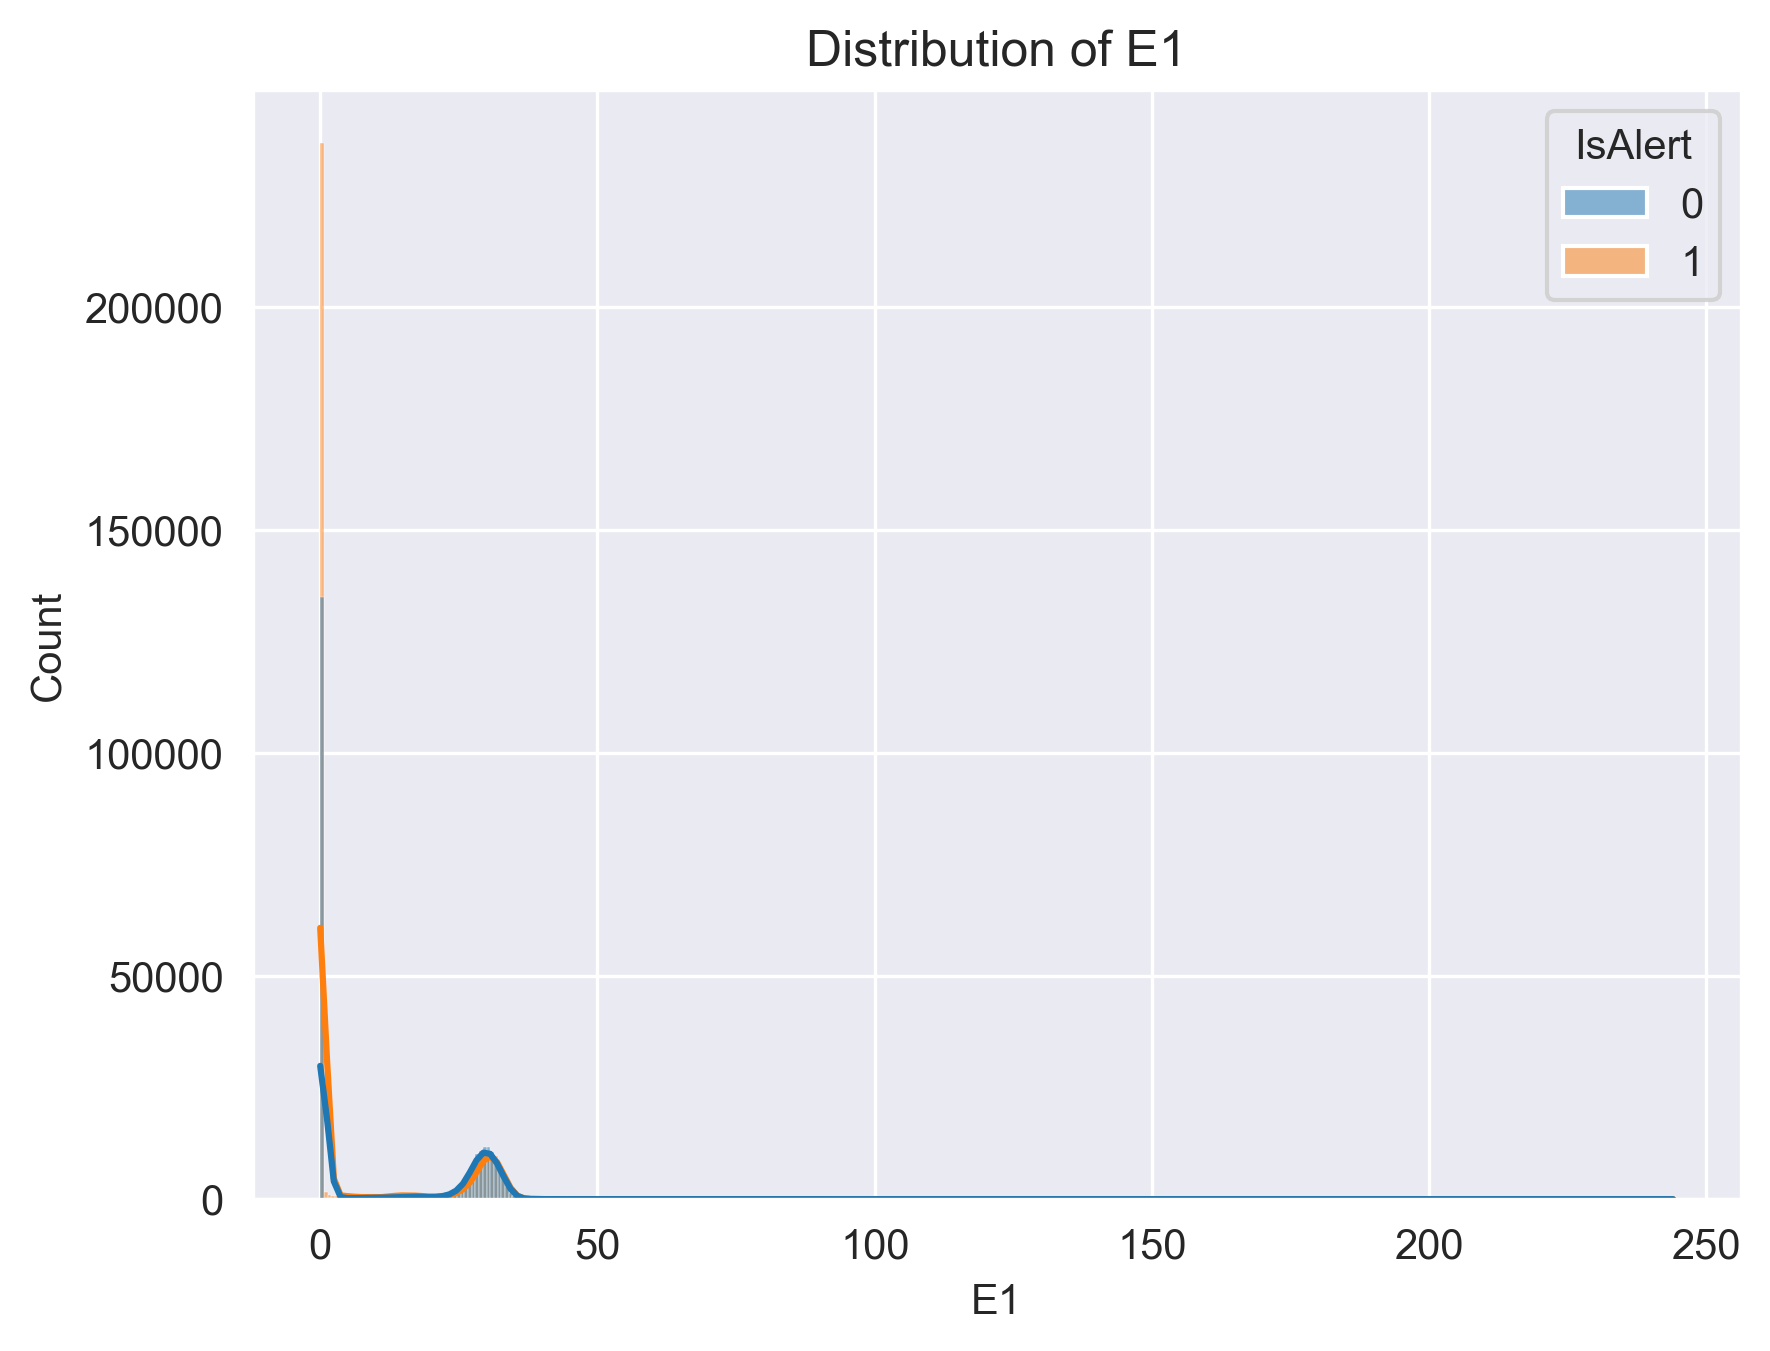

In [20]:
plt.title("Distribution of E1")
sns.histplot(data=train_df,x='E1',kde=True,hue='IsAlert')
outlier(train_df.E1)

**E1 contains 0.01% outliers, which is virtually zero, and most values are sagerigated close to zero.**

In [21]:
plt.title("Distribution of E2")
sns.histplot(data=train_df,x='E2',kde=True,hue='IsAlert')
outlier(train_df.E2)

 Number of Outlier in E2 is 0
 0.0% of Outliers are in E2


**In E2, the majority of values are grouped around 0, and there are no outliers.**

In [22]:
plt.title("Distribution of E3")
sns.histplot(data=train_df,x='E3',kde=True,hue='IsAlert')
outlier(train_df.E3)

 Number of Outlier in E3 is 53791
 8.9% of Outliers are in E3


**Similar to E2, most values in E3 are clustered around zero, however unlike E2, it has 8.9% outliers.**

In [23]:
plt.title("Distribution of E4")
sns.histplot(data=train_df,x='E4',kde=True,hue='IsAlert')
outlier(train_df.E4)

 Number of Outlier in E4 is 87852
 14.54% of Outliers are in E4


**E4 has a large range of data, but the majority of its values are close to zero, and it has 14.54% outliers.**

In [24]:
plt.title("Distribution of E5")
sns.histplot(data=train_df,x='E5',kde=True,hue='IsAlert')
outlier(train_df.E5)

 Number of Outlier in E5 is 123752
 20.48% of Outliers are in E5


**Additionally, it has a large variety of data, but tends to display a bell curve which is a gussian distribution. Additionally, it contains 20.48% outliers.**

 Number of Outlier in E6 is 87574
 14.49% of Outliers are in E6


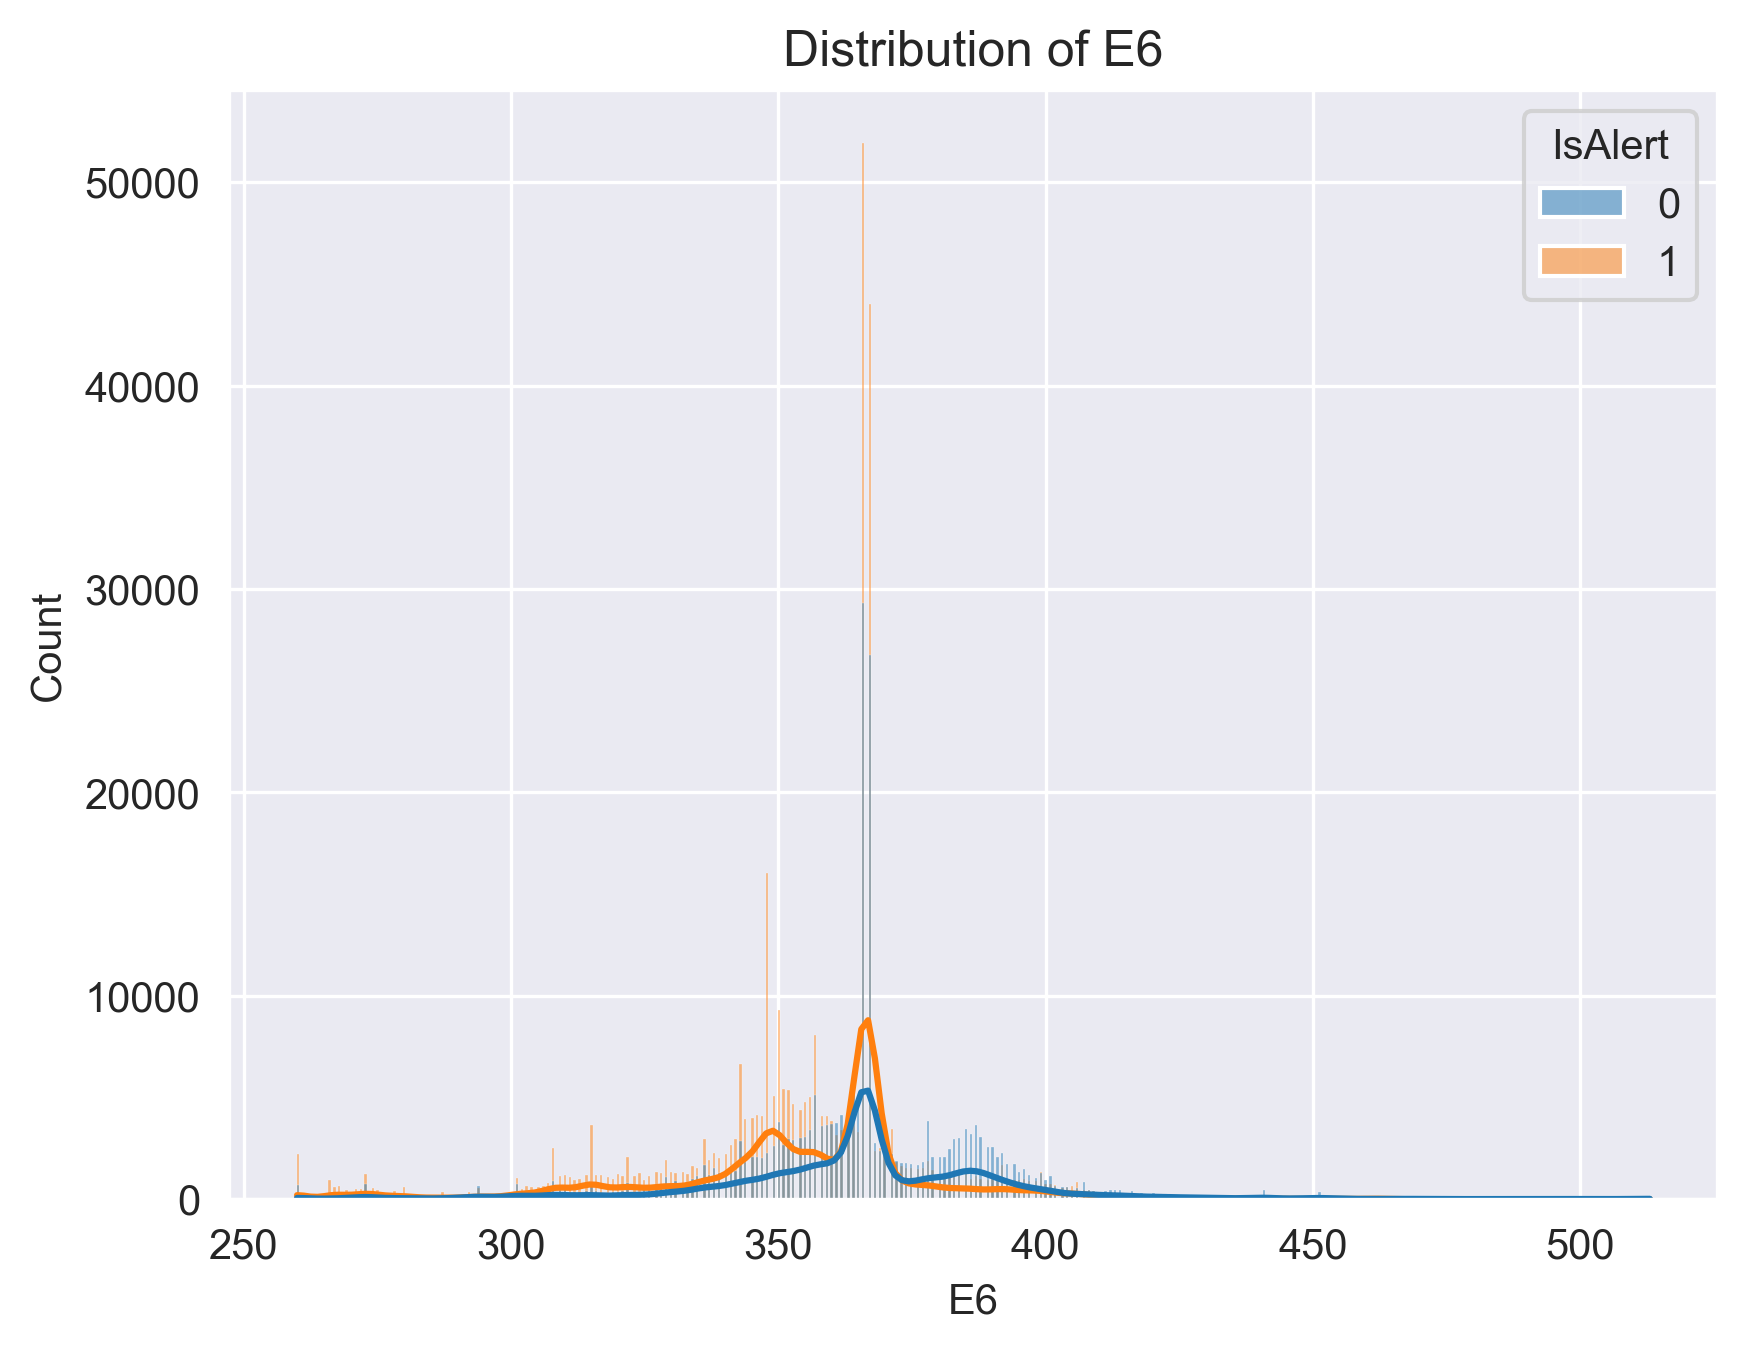

In [25]:
plt.title("Distribution of E6")
sns.histplot(data=train_df,x='E6',kde=True,hue='IsAlert')
outlier(train_df.E6)

**E6 reveals a distribution that is nearly Gussian.**

 Number of Outlier in E7 is 52203
 8.64% of Outliers are in E7


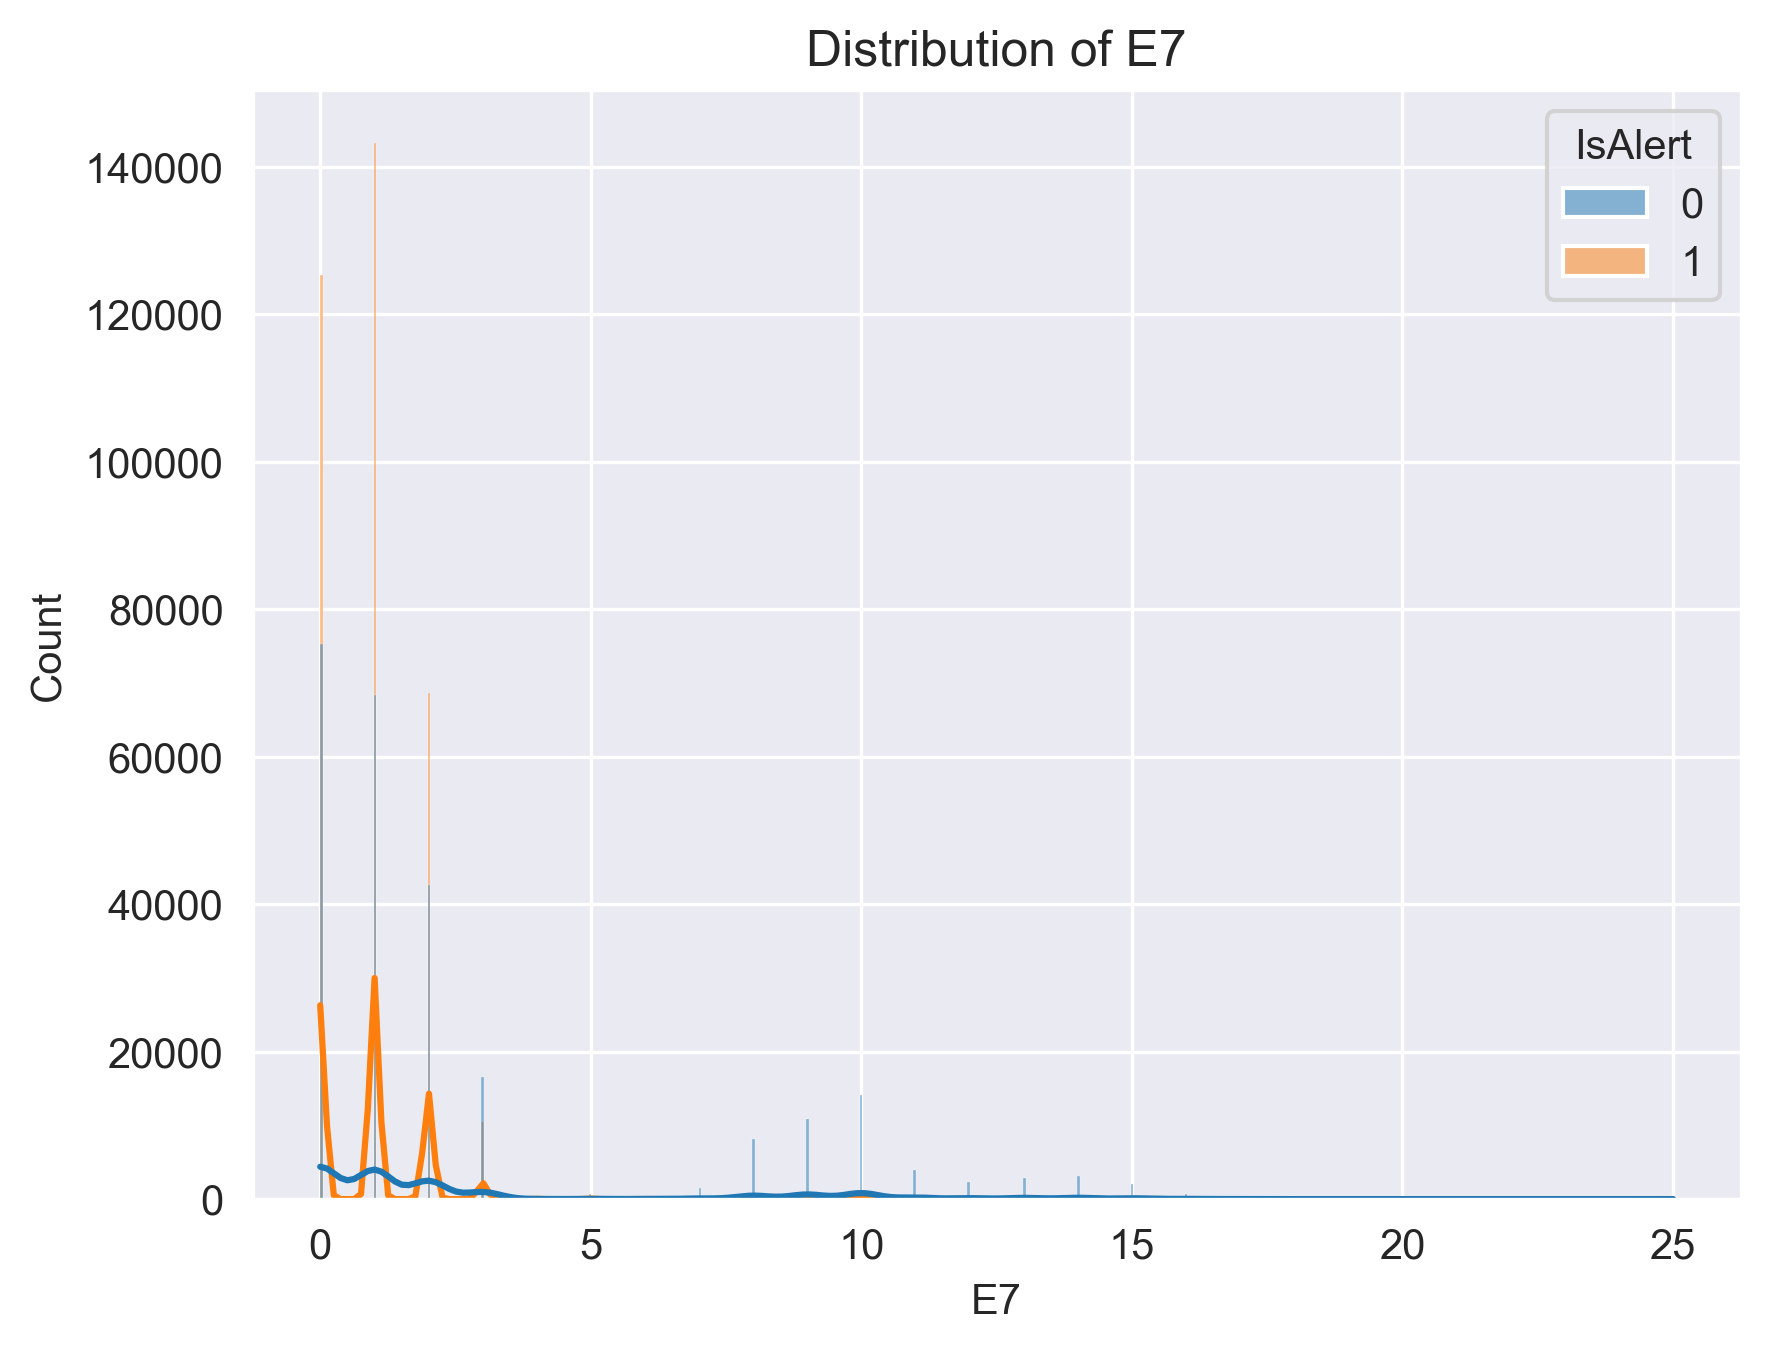

In [26]:
plt.title("Distribution of E7")
sns.histplot(data=train_df,x='E7',kde=True,hue='IsAlert')
outlier(train_df.E7)

**E7 Display values that are extremely near to zero and 8.64% outliers**

In [27]:
plt.title("Distribution of E8")
sns.histplot(data=train_df,x='E8',kde=True,hue='IsAlert')
outlier(train_df.E8)

 Number of Outlier in E8 is 25471
 4.21% of Outliers are in E8


**Right-skewed distribution of E8 with 4.21 percent outliers**

 Number of Outlier in E9 is 74461
 12.32% of Outliers are in E9


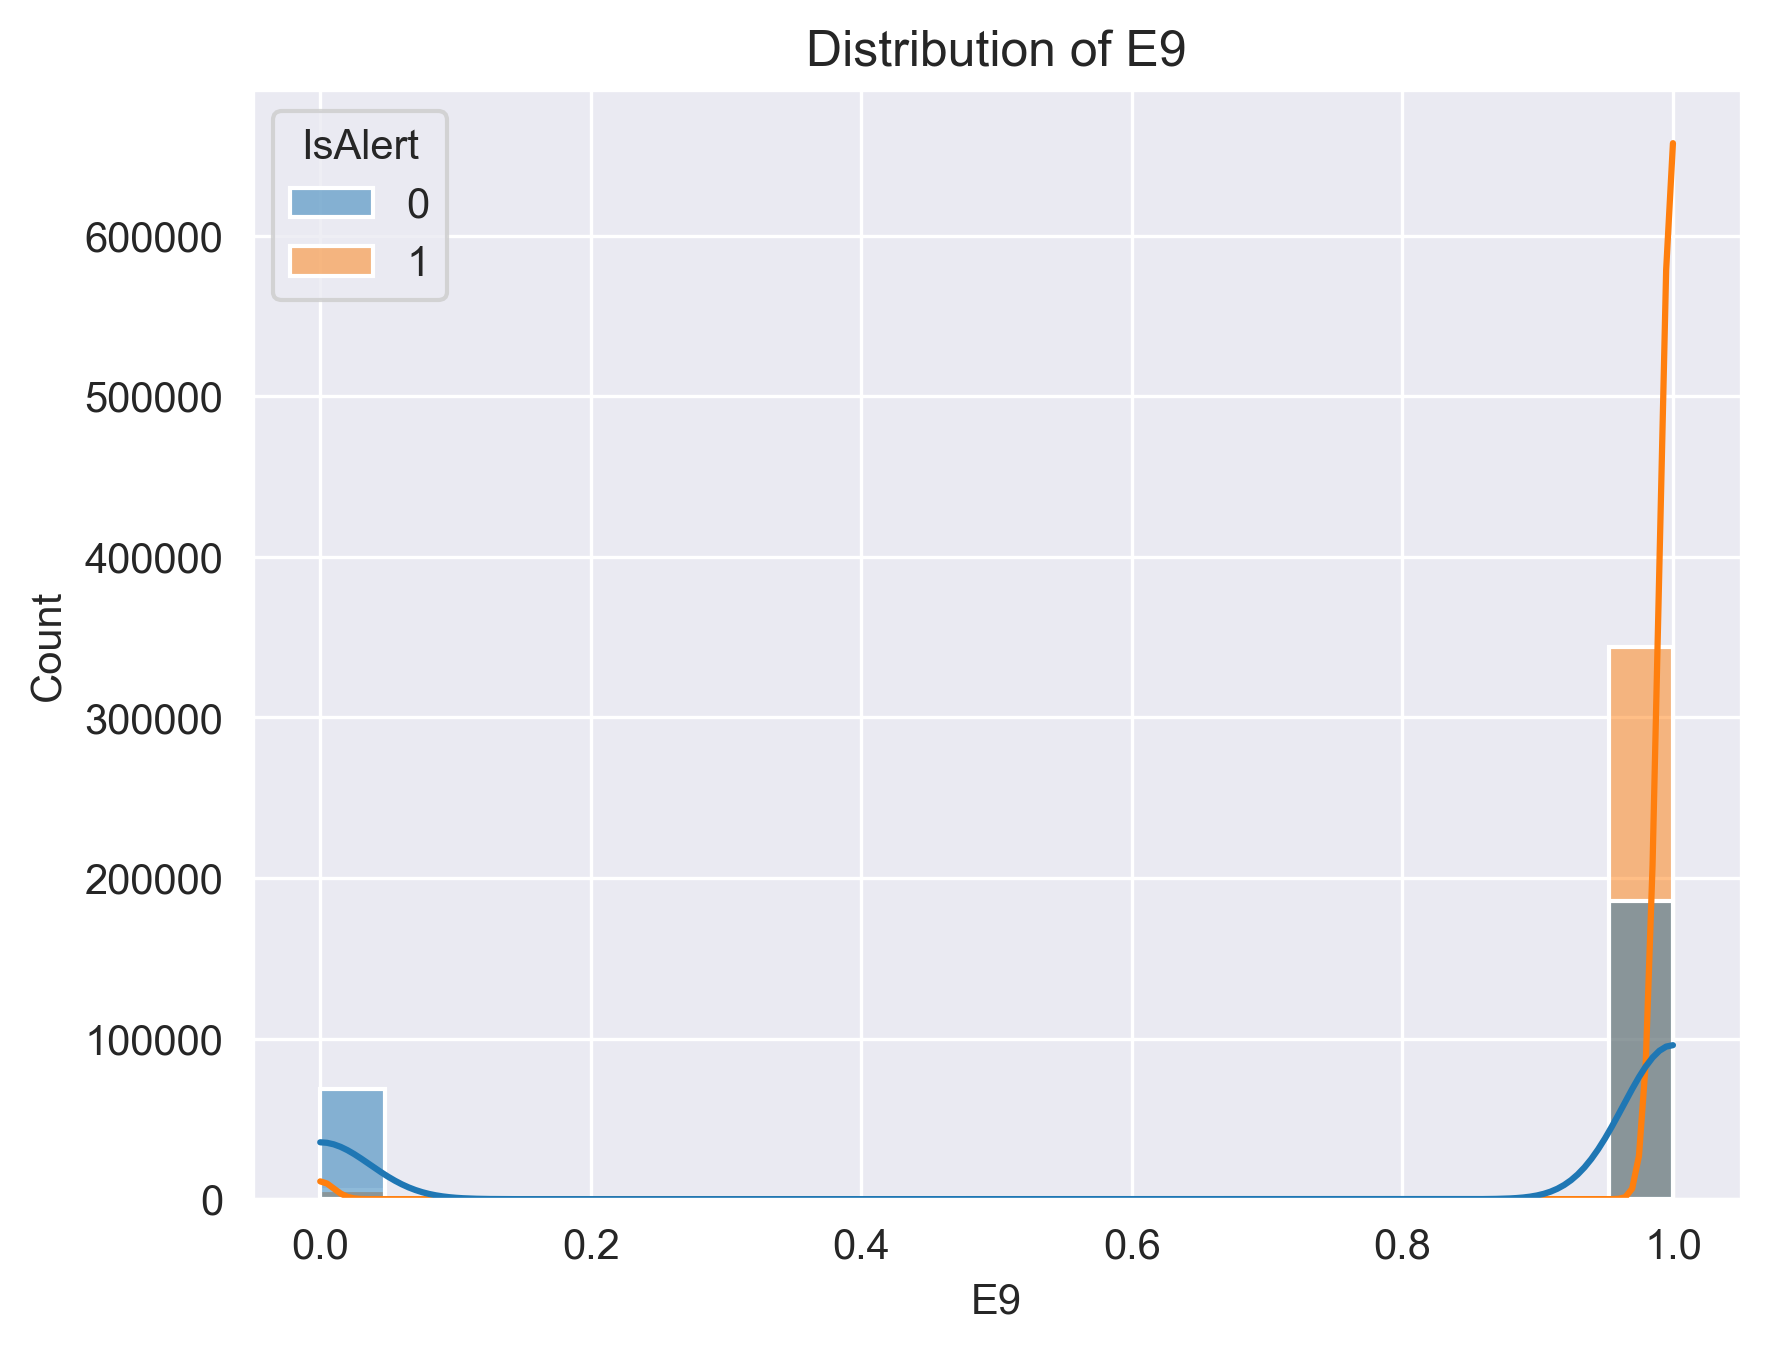

In [28]:
plt.title("Distribution of E9")
sns.histplot(data=train_df,x='E9',kde=True,hue='IsAlert')
outlier(train_df.E9)

**The majority of E9's values cluster around 1, and it contains 12.32% outliers**

In [29]:
plt.title("Distribution of E10")
sns.histplot(data=train_df,x='E10',kde=True,hue='IsAlert')
outlier(train_df.E10)

 Number of Outlier in E10 is 12914
 2.14% of Outliers are in E10


**With 2.14% outliers, the distribution of E10 is right skewed.**

 Number of Outlier in E11 is 41231
 6.82% of Outliers are in E11


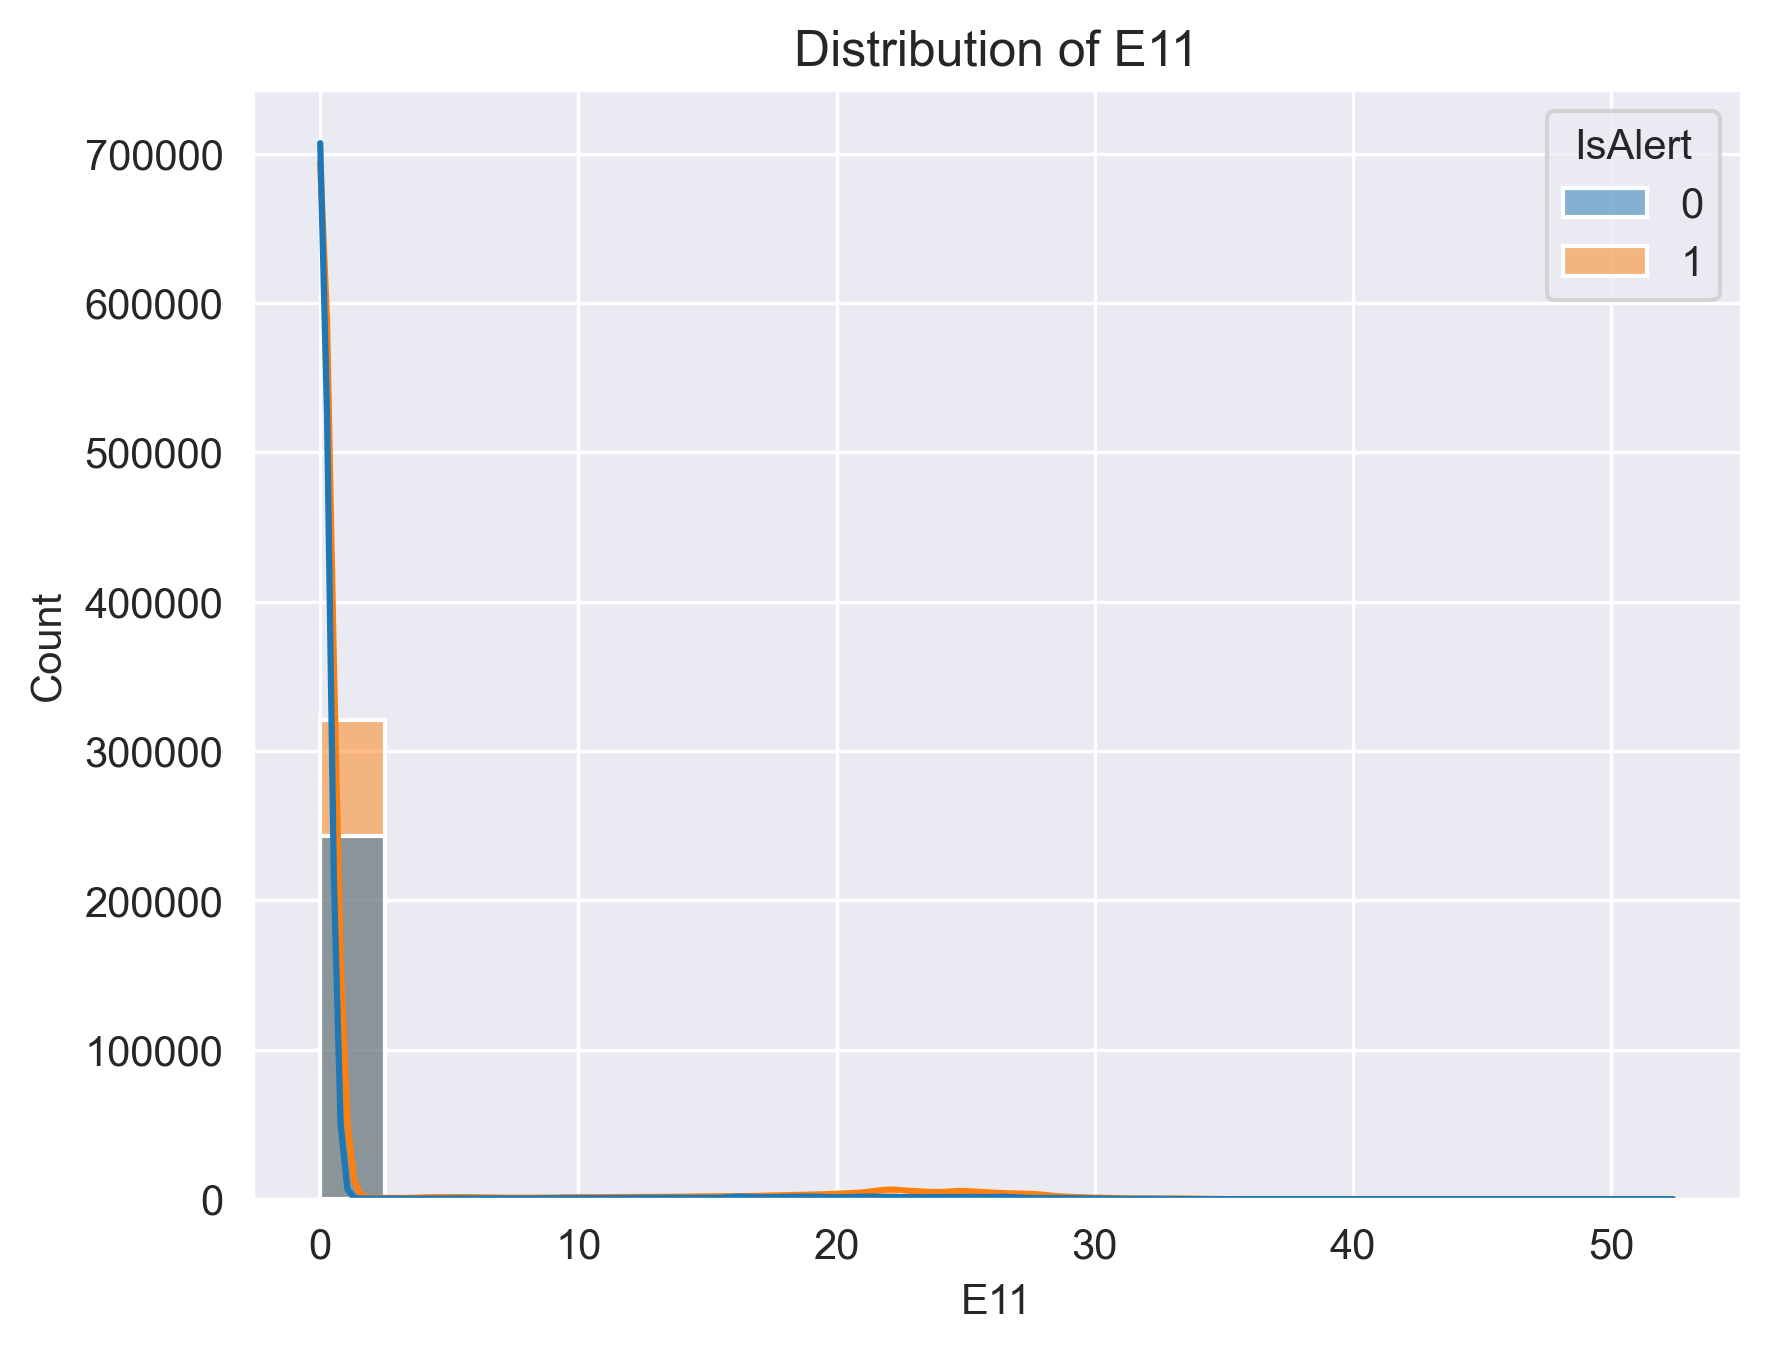

In [30]:
plt.title("Distribution of E11")
sns.histplot(data=train_df,x='E11',kde=True,hue='IsAlert')
outlier(train_df.E11)

**With 6.82% outliers, most of value E11 is near to zero.**

## Analysis of vehicular data

 Number of Outlier in V1 is 0
 0.0% of Outliers are in V1


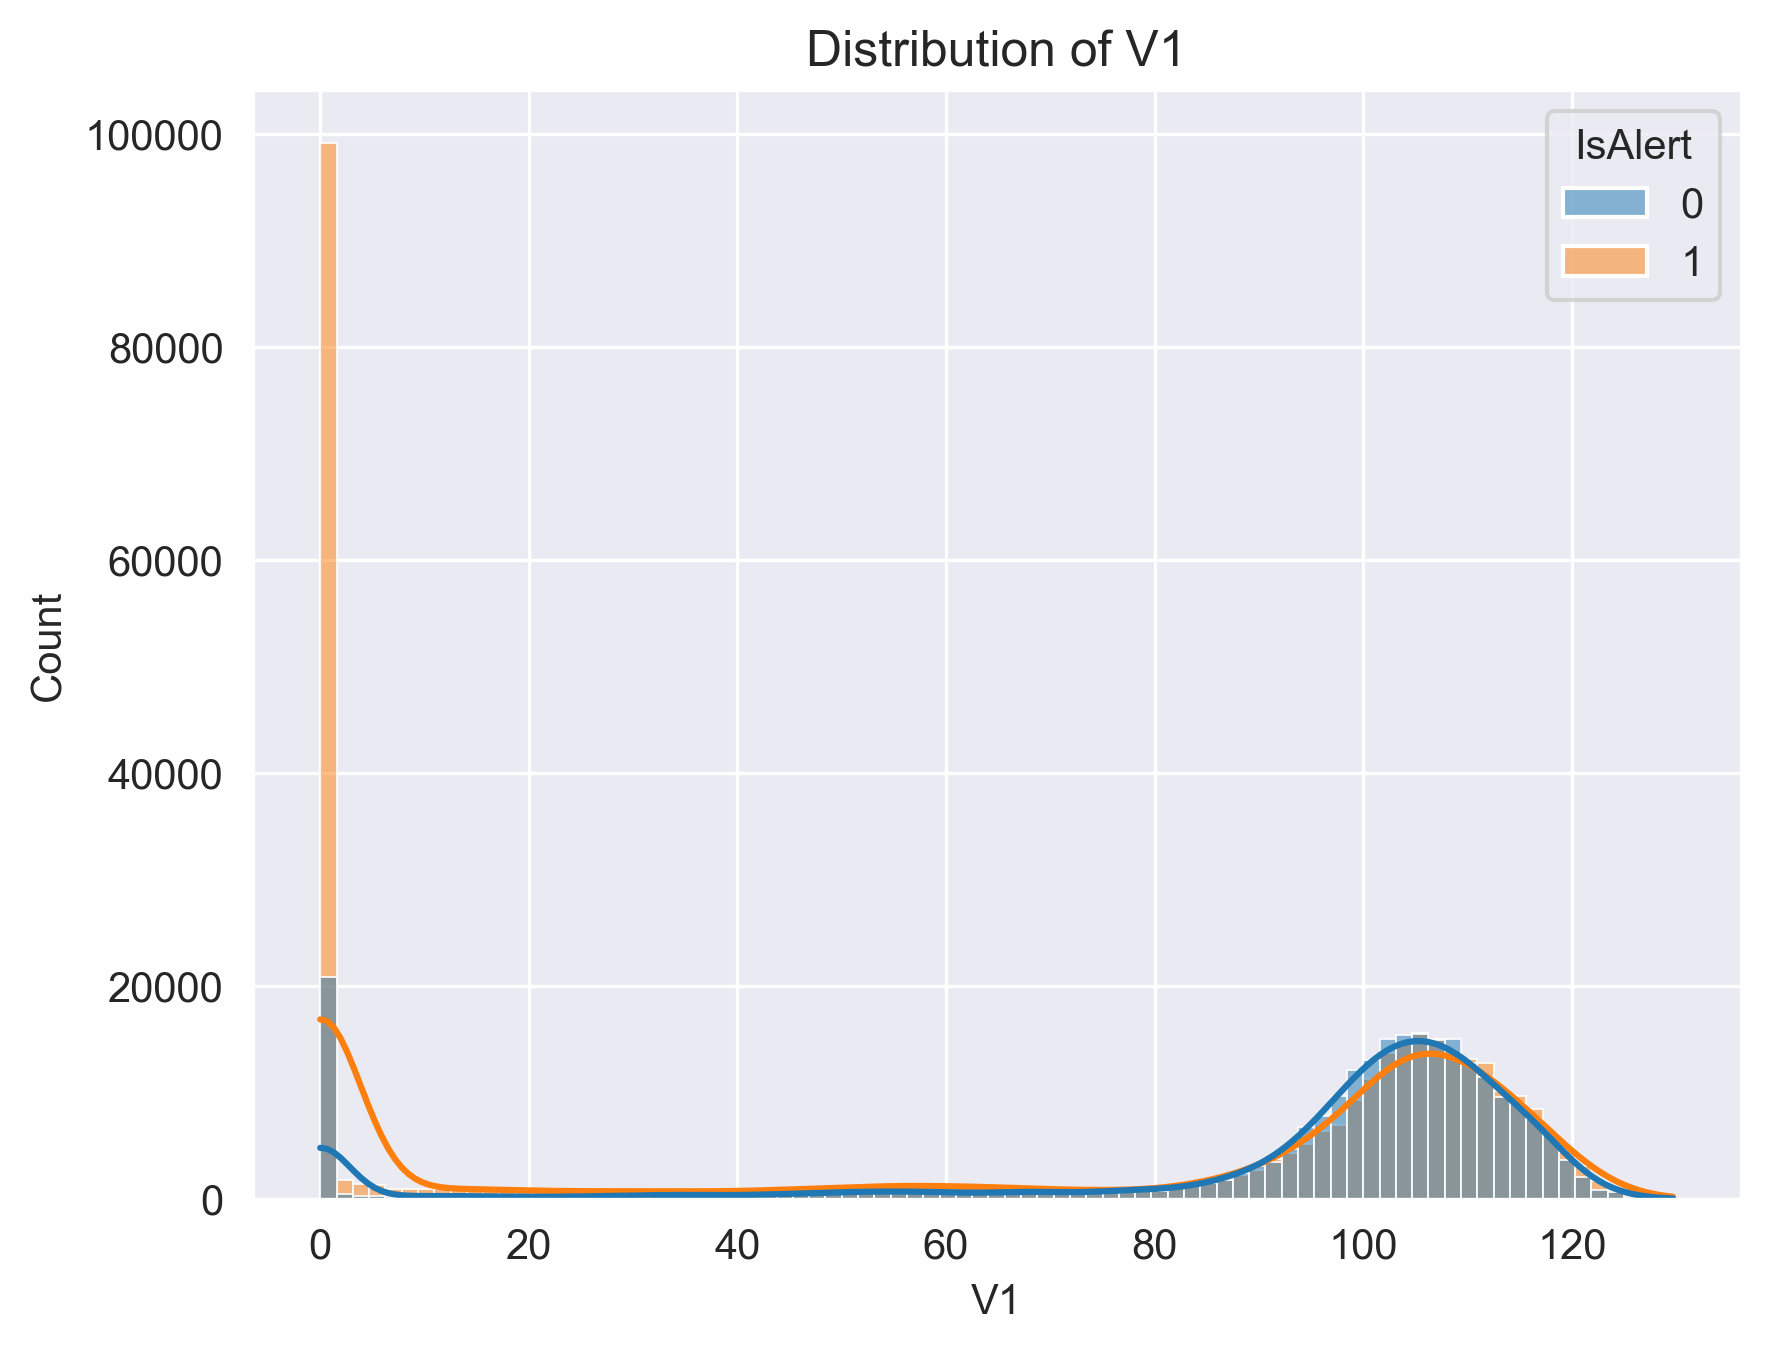

In [31]:
plt.title("Distribution of V1")
sns.histplot(data=train_df,x='V1',kde=True,hue='IsAlert')
outlier(train_df.V1)

**The majority of data are clustered around 0, but there is a spike from about 90 that doesn't have any outliers.**

 Number of Outlier in V2 is 88873
 14.71% of Outliers are in V2


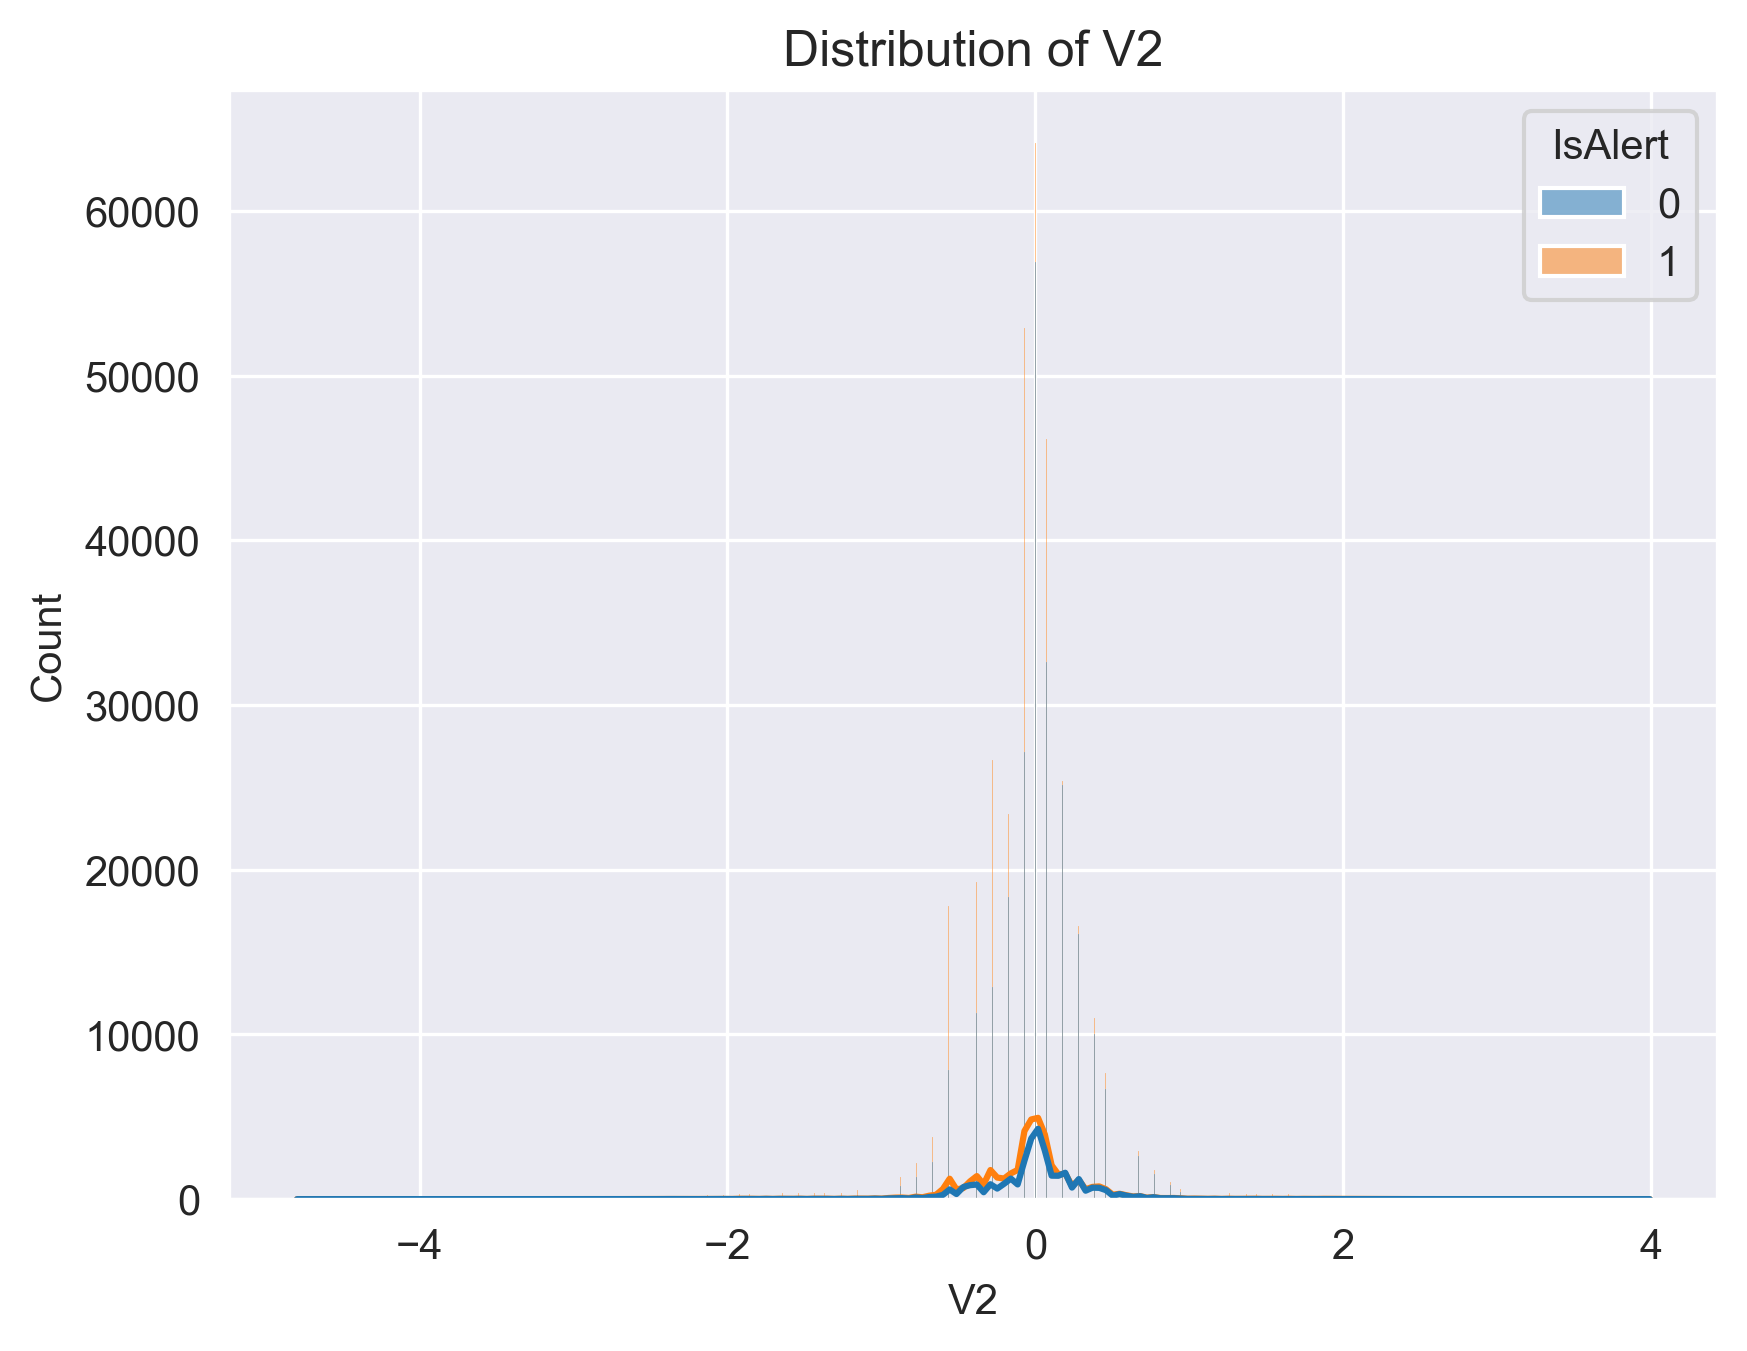

In [32]:
plt.title("Distribution of V2")
sns.histplot(data=train_df,x='V2',kde=True,hue='IsAlert')
outlier(train_df.V2)

**Gussian Distribution is followed, and there are 14.71% outliers.**

 Number of Outlier in V3 is 0
 0.0% of Outliers are in V3


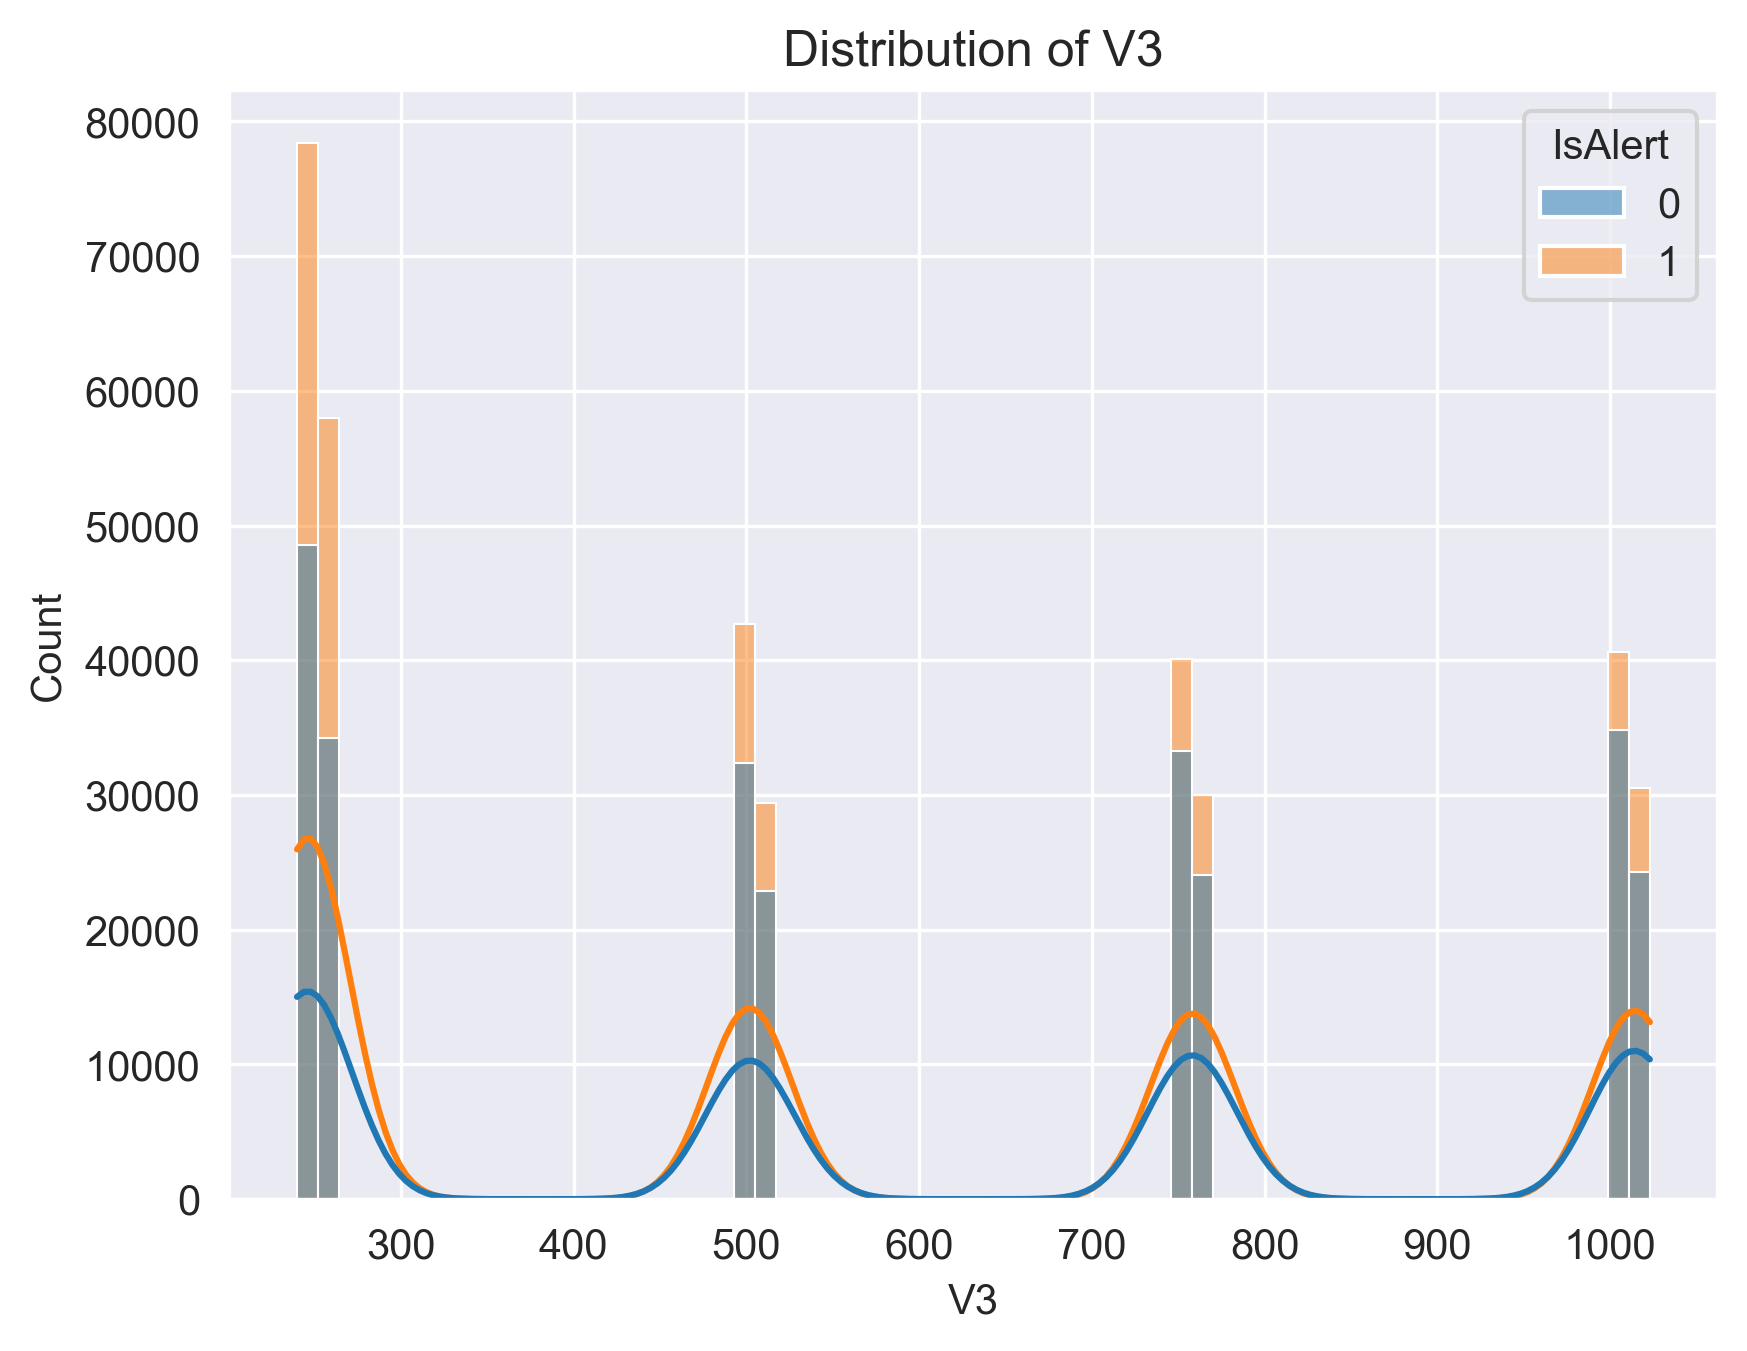

In [33]:
plt.title("Distribution of V3")
sns.histplot(data=train_df,x='V3',kde=True,hue='IsAlert')
outlier(train_df.V3)

**Uneven distribution can be seen in V3.**

 Number of Outlier in V4 is 85329
 14.12% of Outliers are in V4


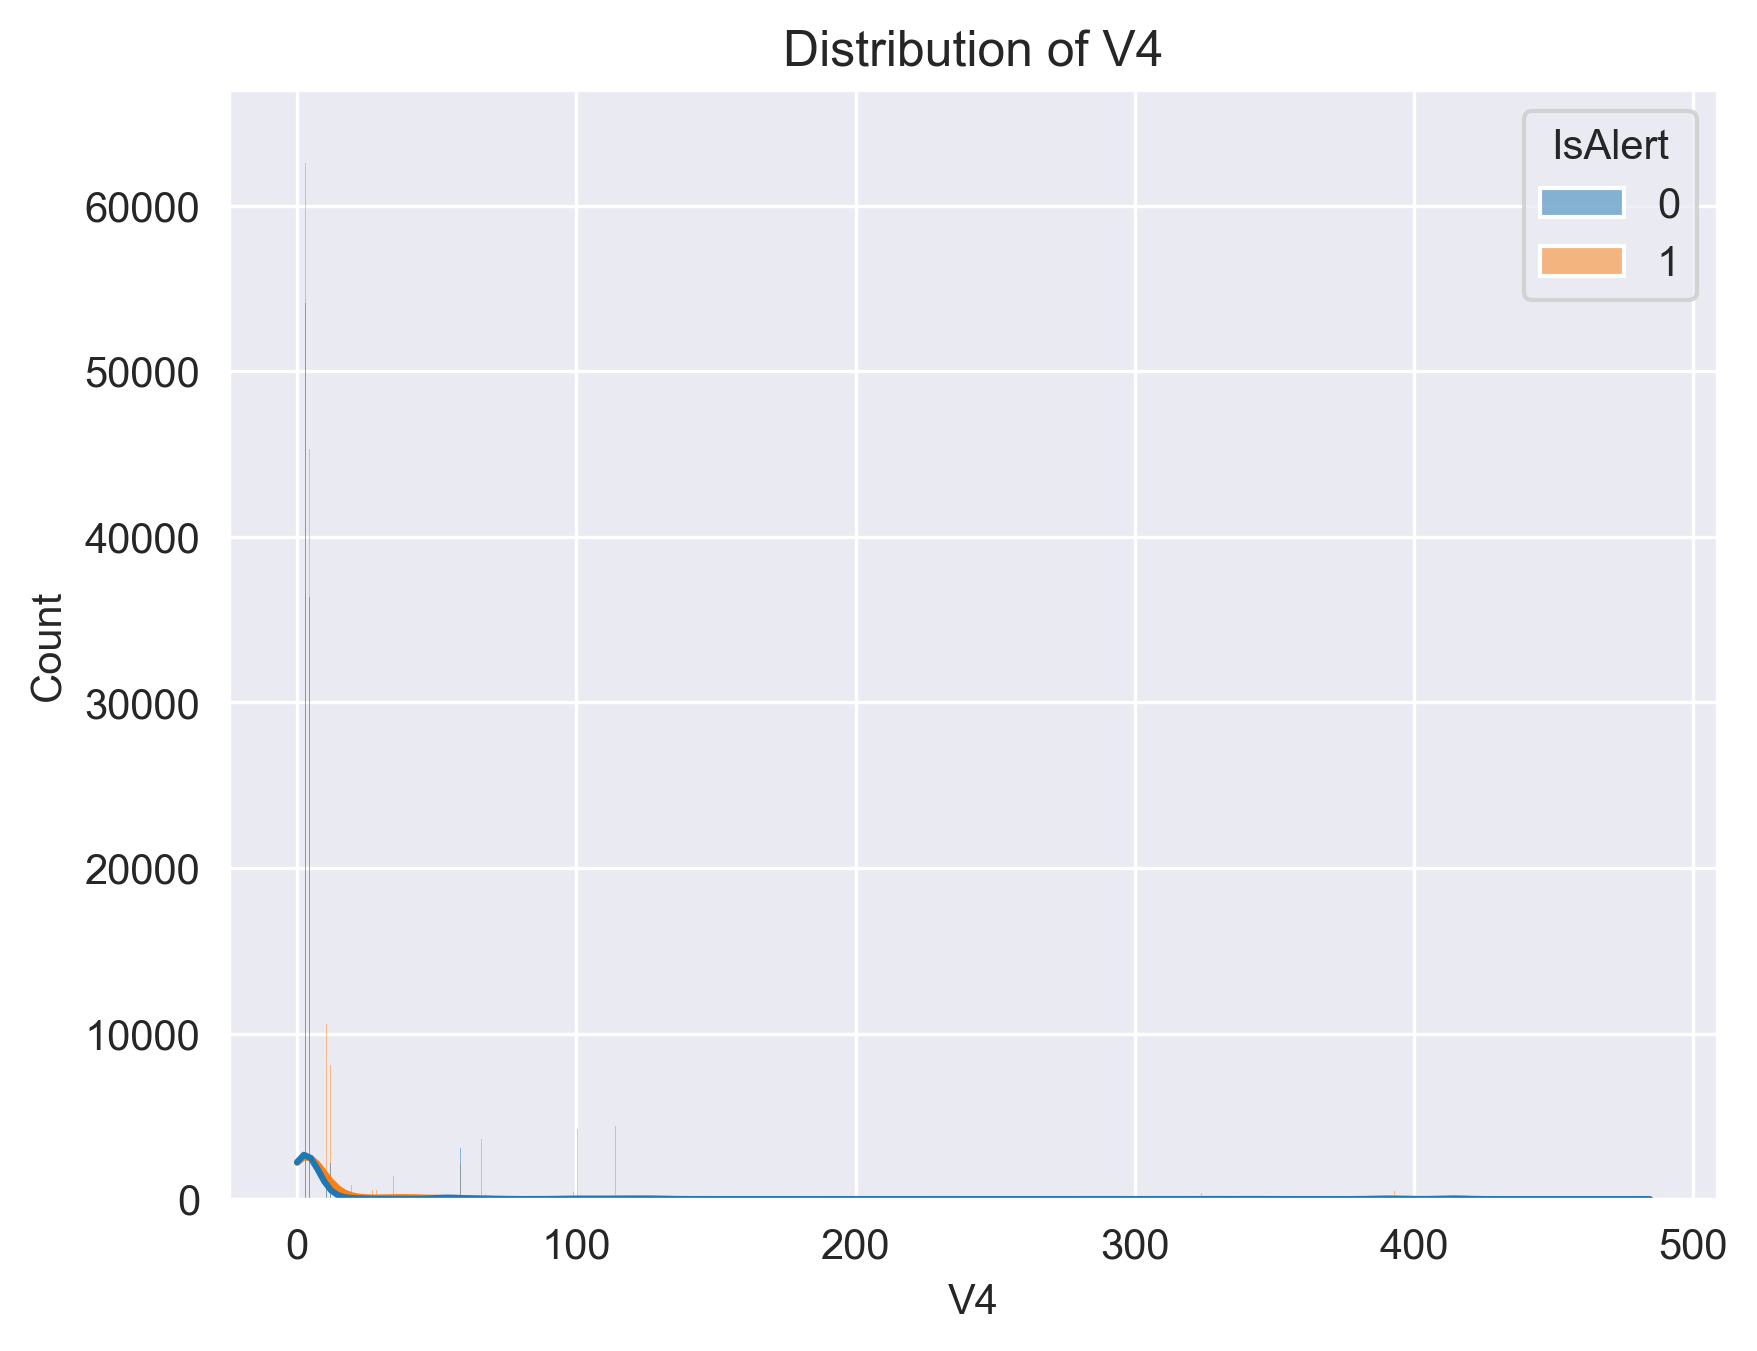

In [34]:
plt.title("Distribution of V4")
sns.histplot(data=train_df,x='V4',kde=True,hue='IsAlert')
outlier(train_df.V4)

**With 14.12% outliers, most of value V4 is near to zero.**

 Number of Outlier in V5 is 108667
 17.98% of Outliers are in V5


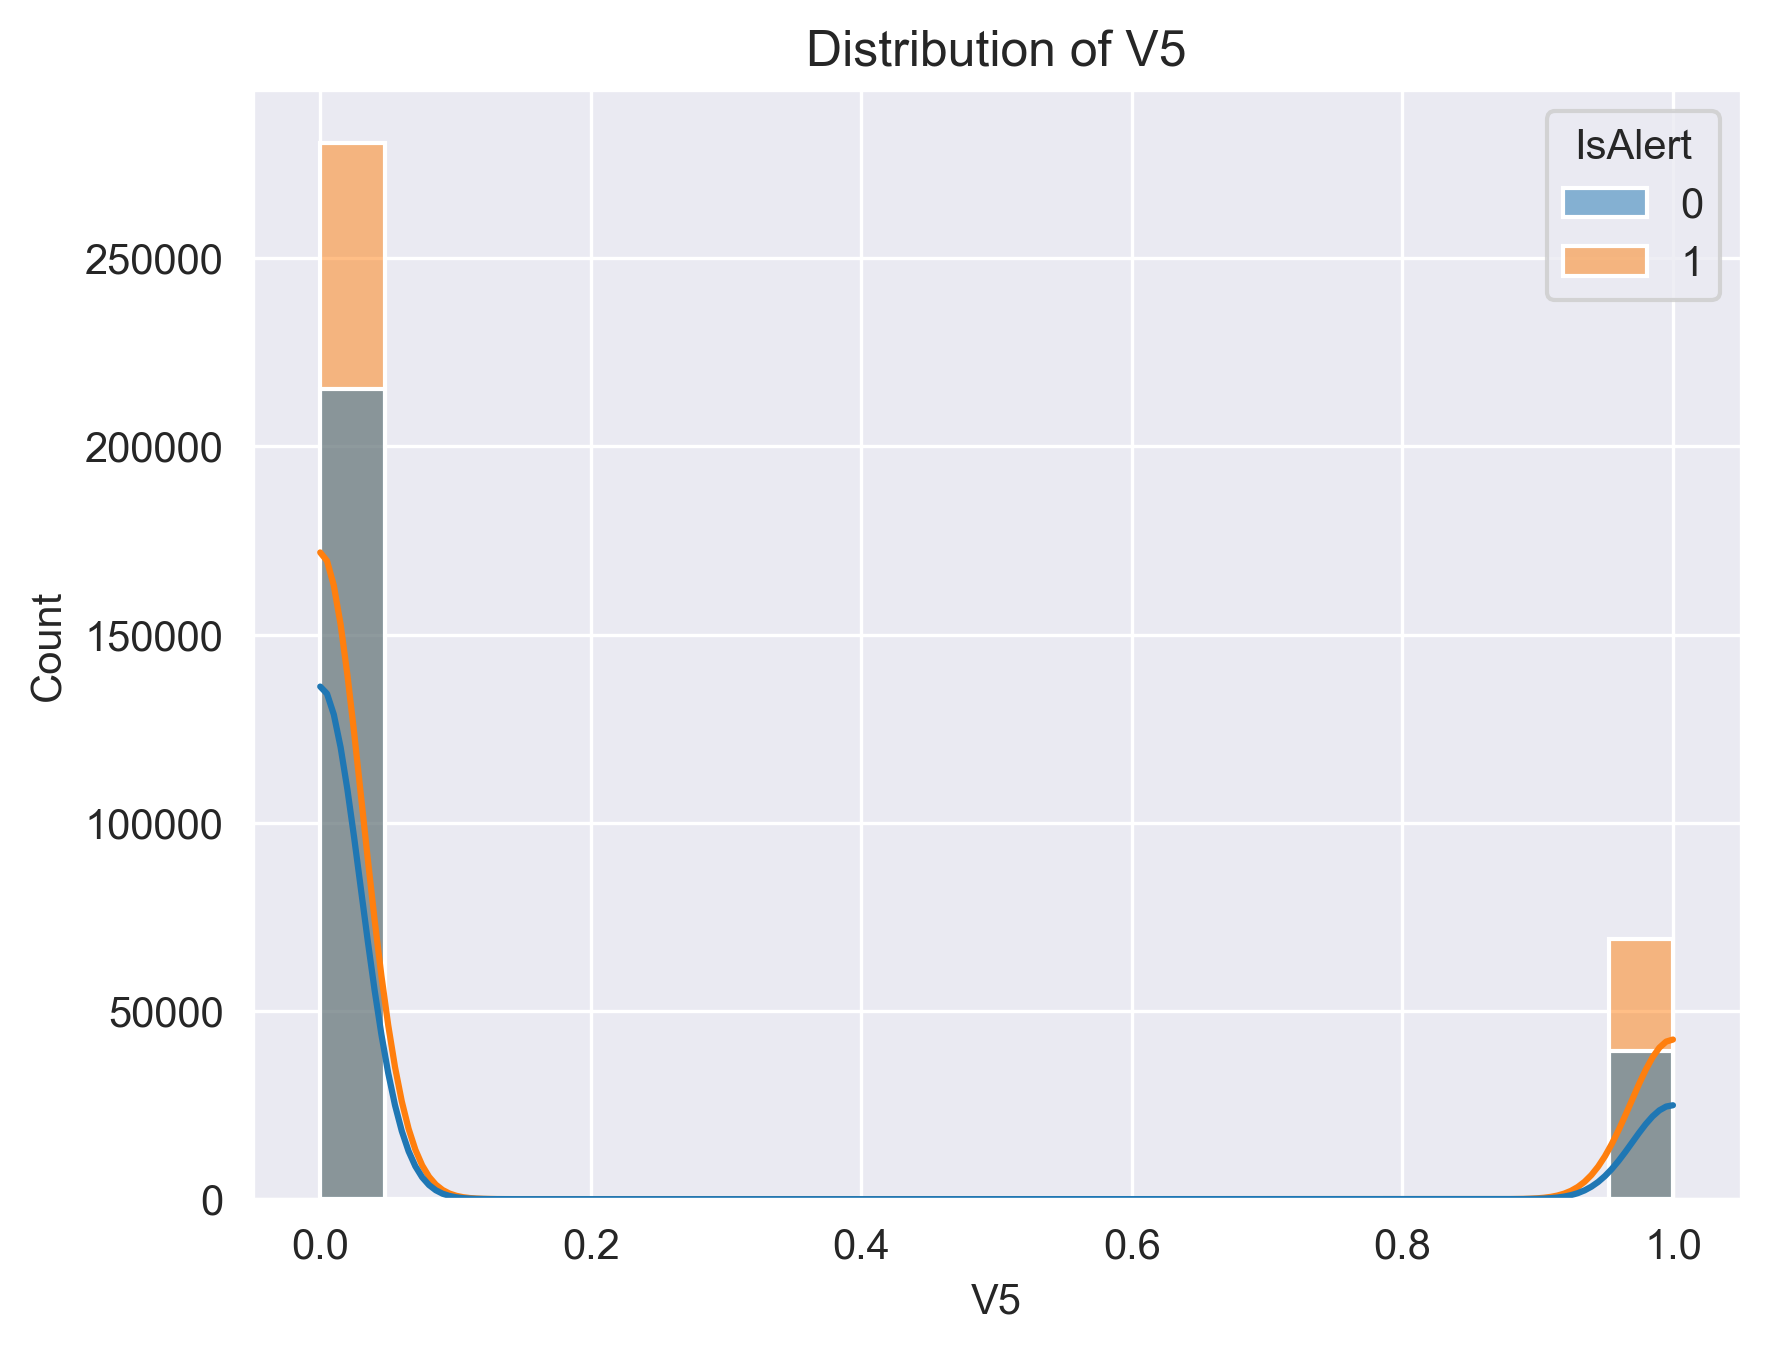

In [35]:
plt.title("Distribution of V5")
sns.histplot(data=train_df,x='V5',kde=True,hue='IsAlert')
outlier(train_df.V5)

**With 17.98% outliers, most of value V5 is near to zero.**

 Number of Outlier in V6 is 17
 0.0% of Outliers are in V6


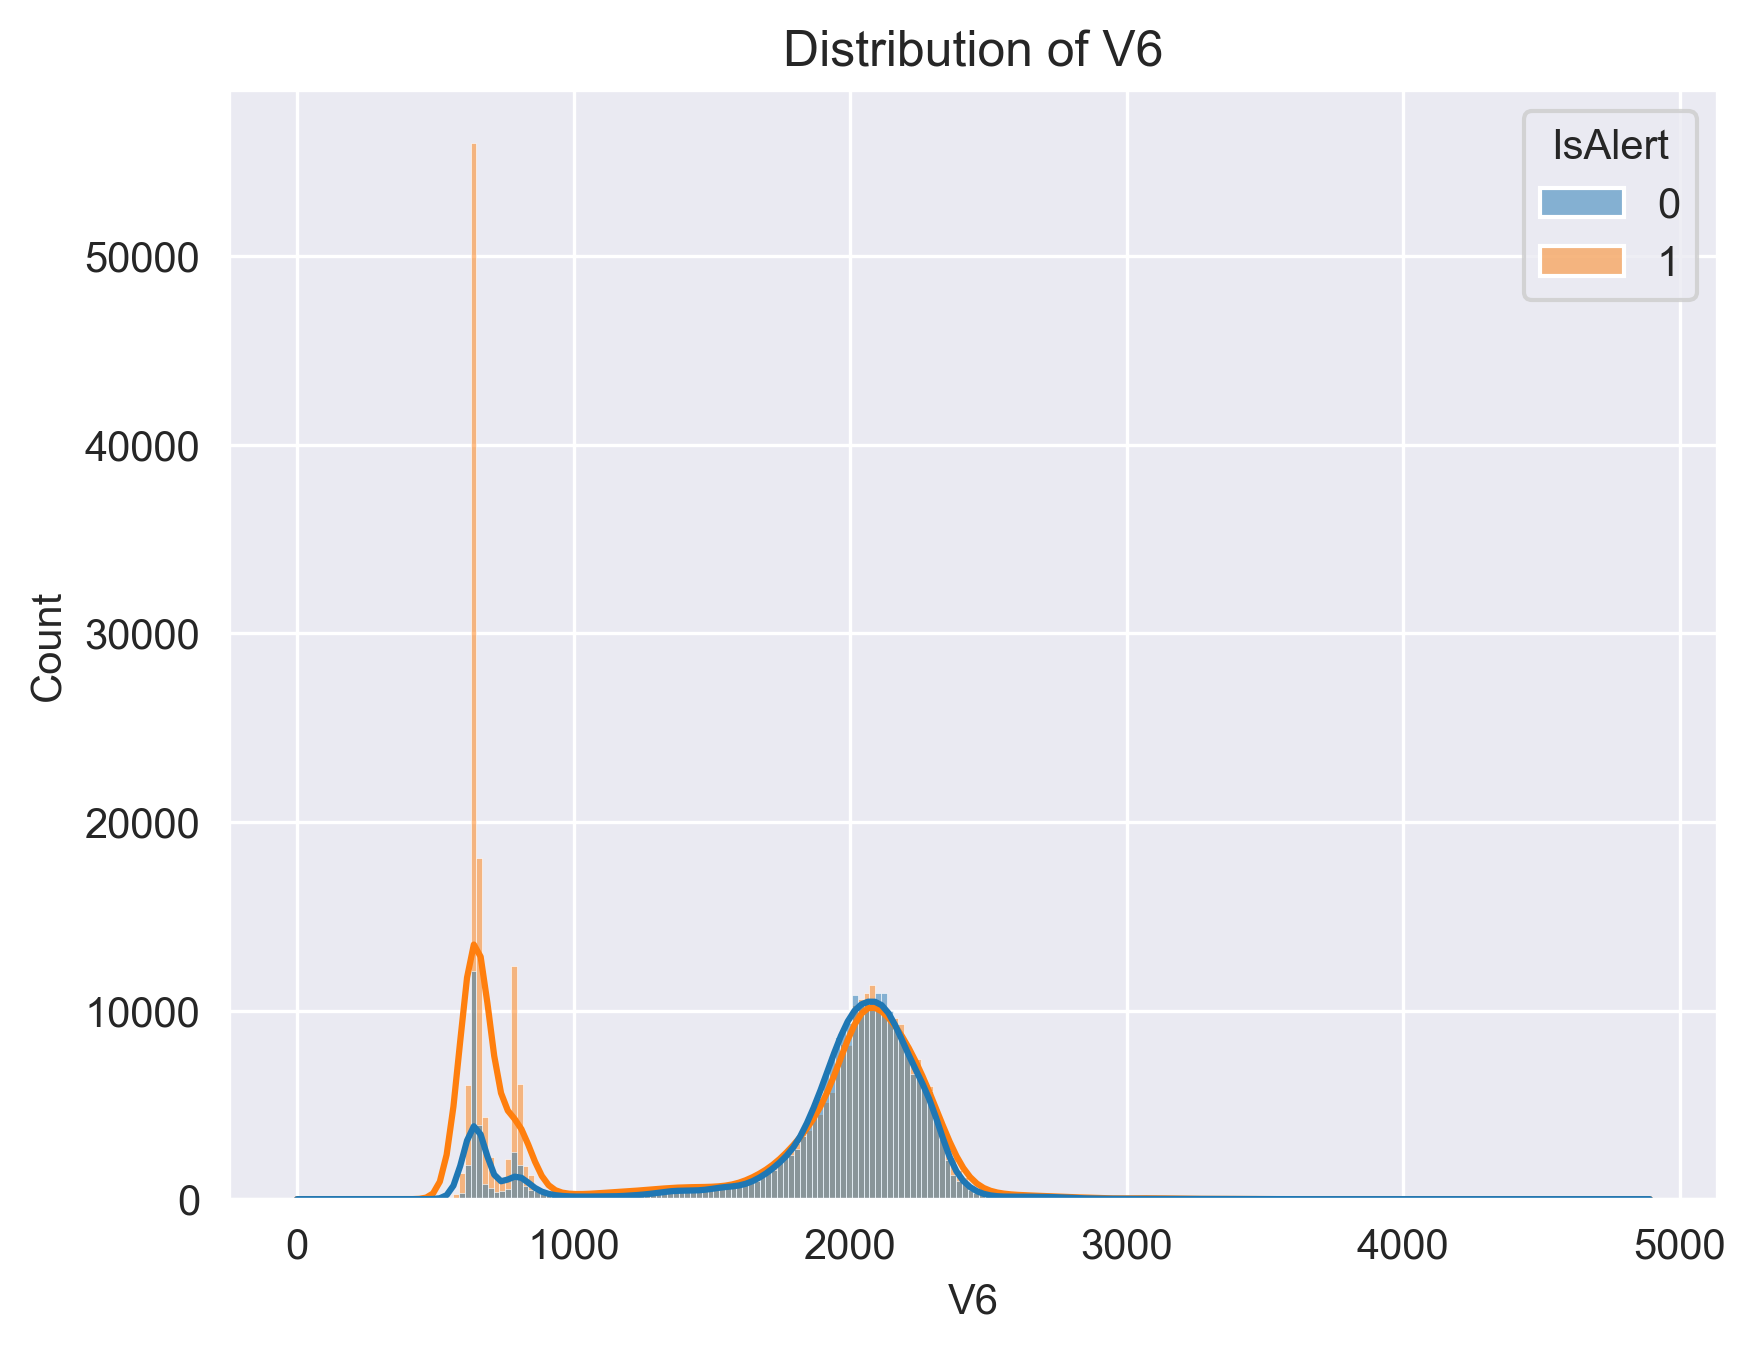

In [36]:
plt.title("Distribution of V6")
sns.histplot(data=train_df,x='V6',kde=True,hue='IsAlert')
outlier(train_df.V6)

**The distribution of V6 is roughly Gussian and there are no outliers.**

 Number of Outlier in V7 is 0
 0.0% of Outliers are in V7


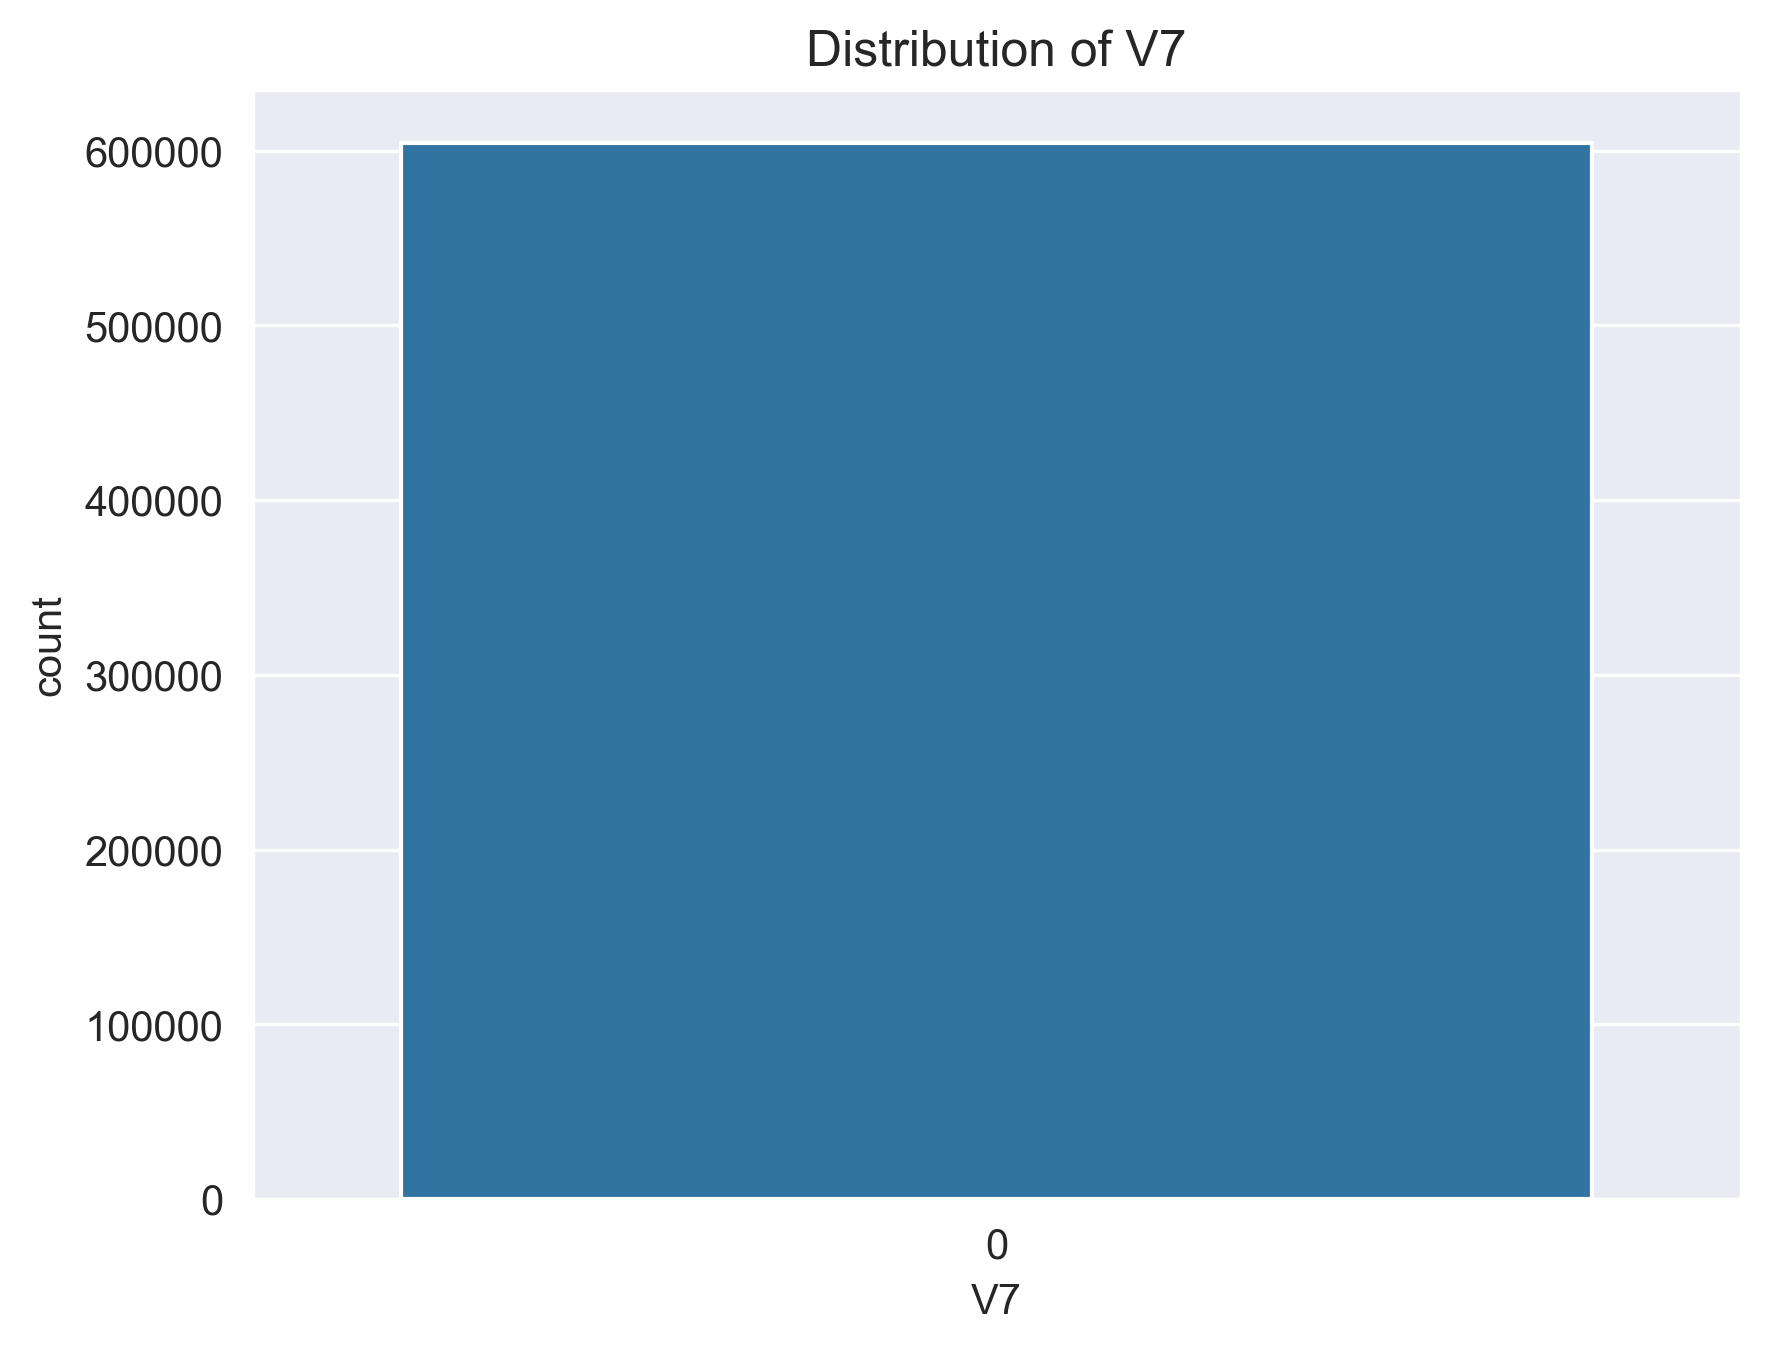

In [37]:
plt.title("Distribution of V7")
sns.countplot(data=train_df,x='V7')
outlier(train_df.V7)

**V7's values are all zero.**

In [38]:
plt.title("Distribution of V8")
sns.histplot(data=train_df,x='V8',kde=True,hue='IsAlert')
outlier(train_df.V8)

 Number of Outlier in V8 is 542
 0.09% of Outliers are in V8


**The majority of V8's values are near zero, but we observe a spike in value starting at about 15 with 0.09% outliers.**

 Number of Outlier in V9 is 0
 0.0% of Outliers are in V9


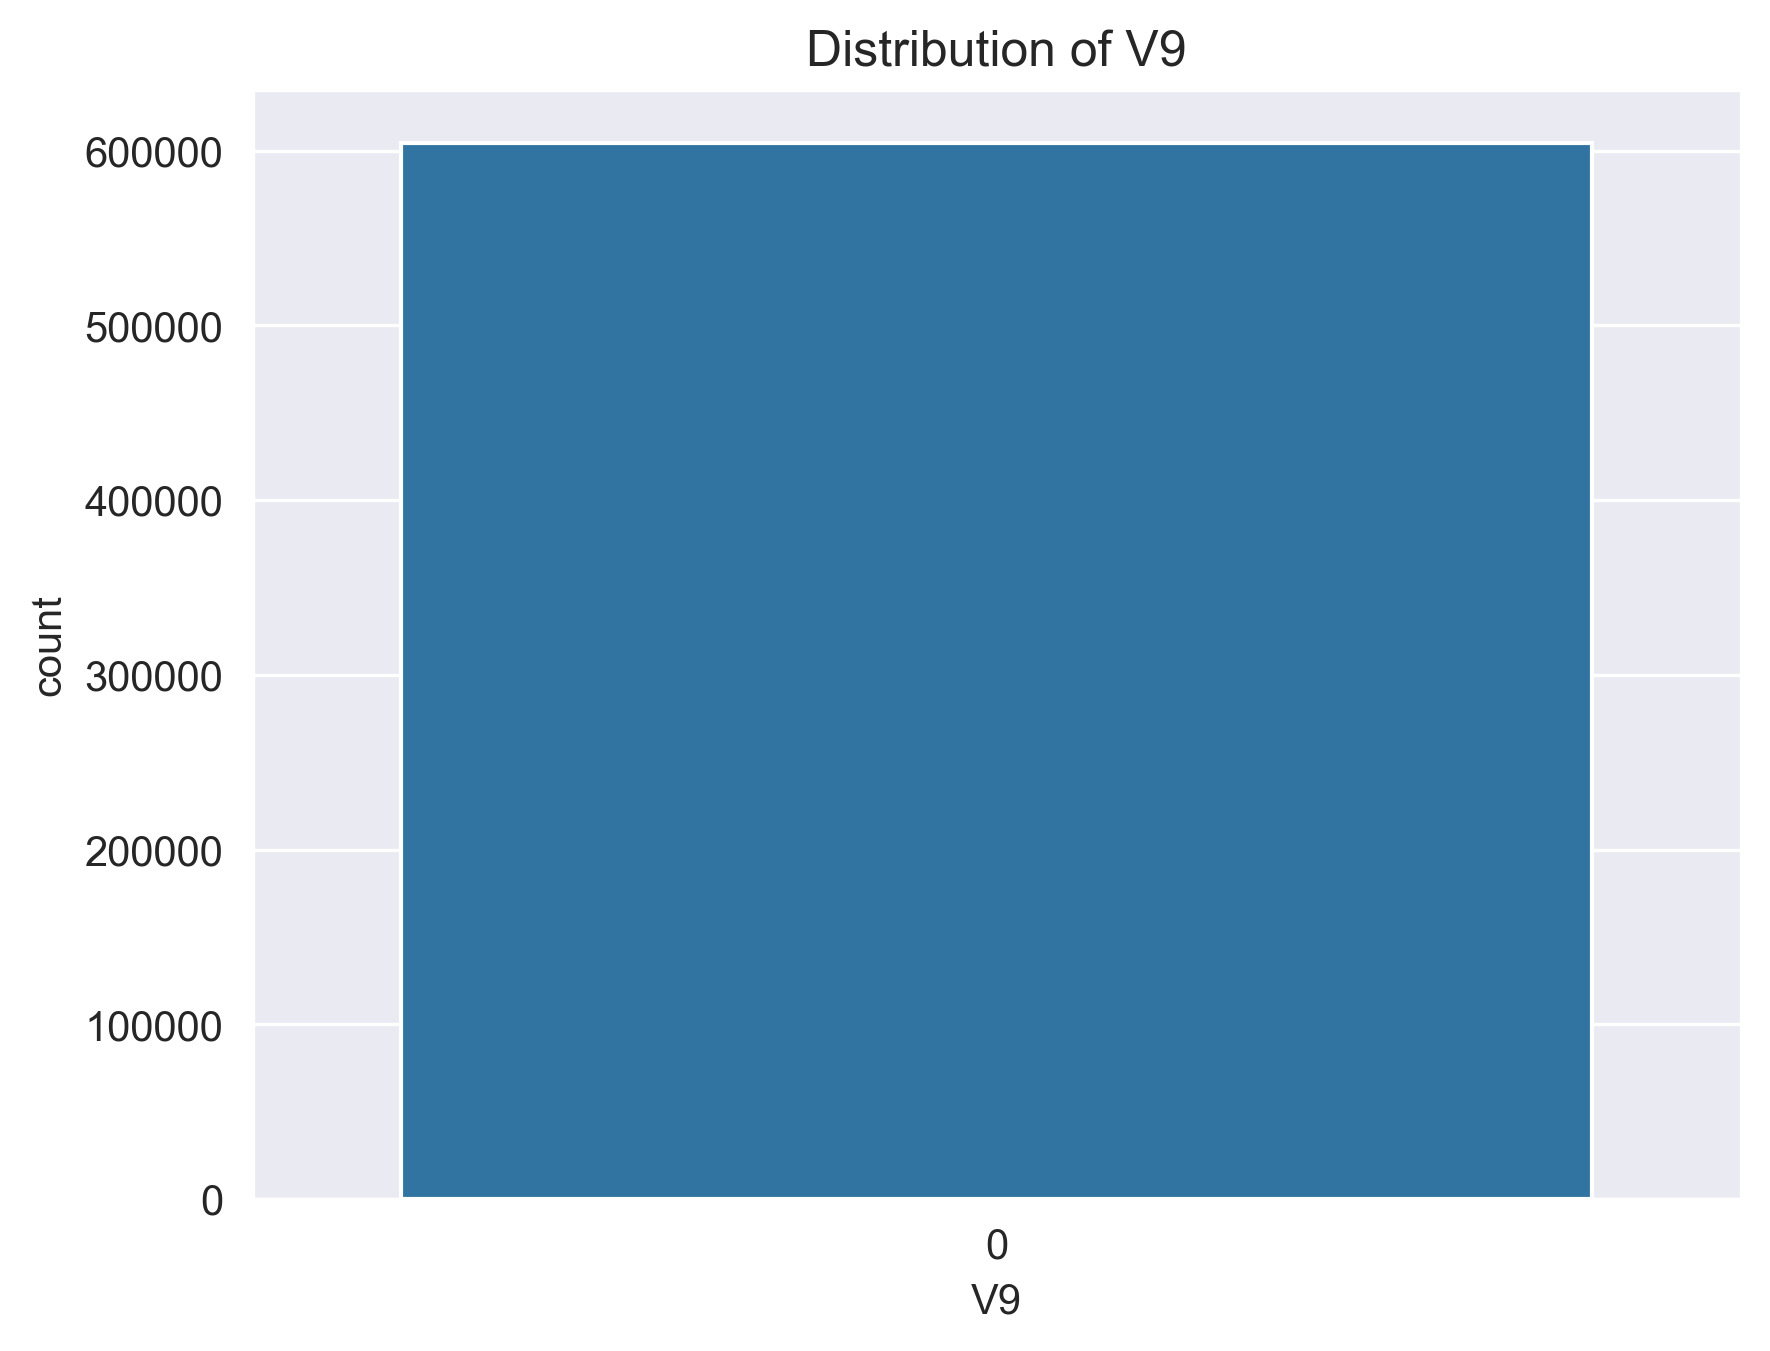

In [39]:
plt.title("Distribution of V9")
sns.countplot(data=train_df,x='V9')
outlier(train_df.V9)

**V9's values are all zero.**

 Number of Outlier in V10 is 129161
 21.37% of Outliers are in V10


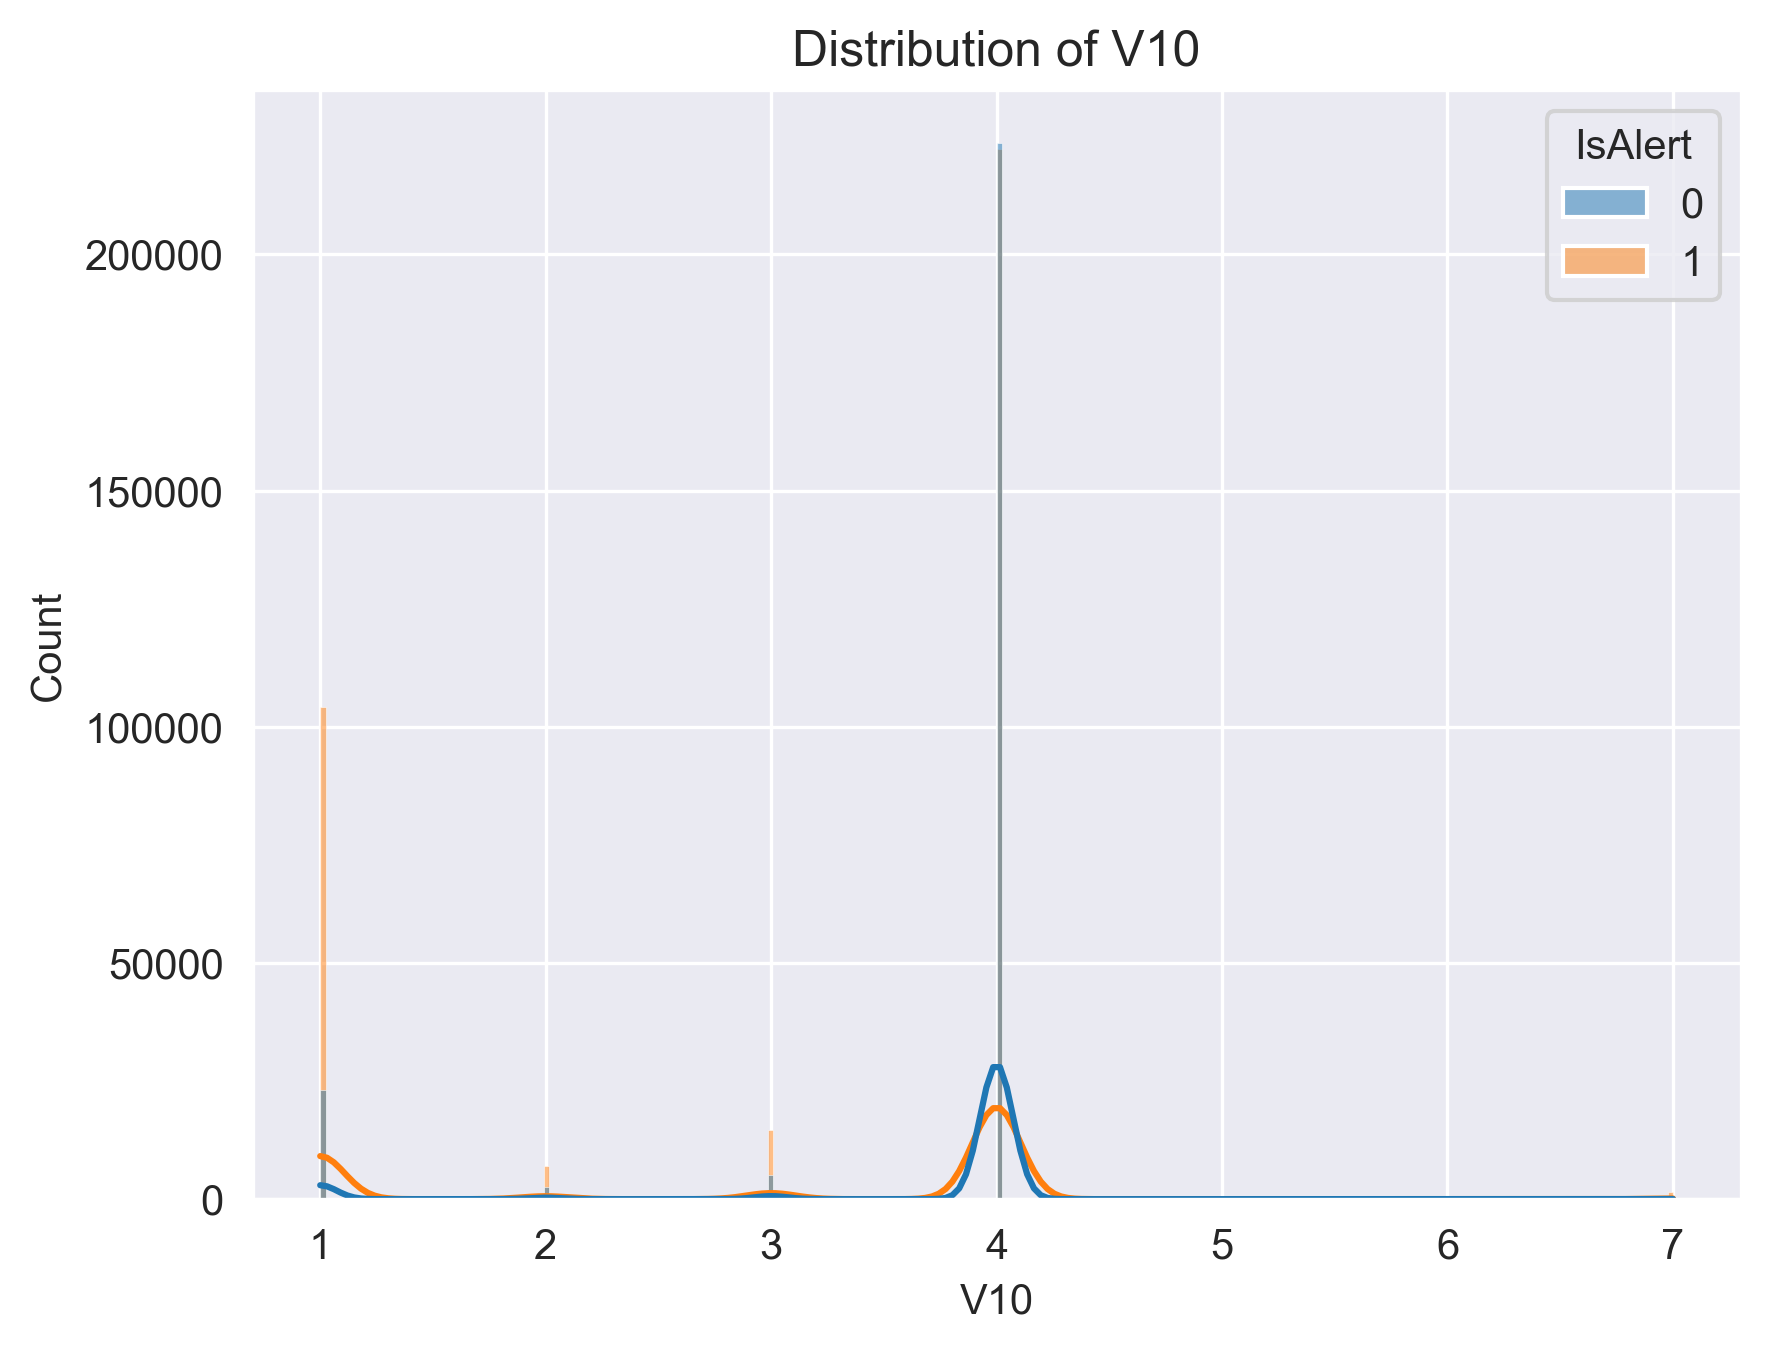

In [40]:
plt.title("Distribution of V10")
sns.histplot(data=train_df,x='V10',kde=True,hue='IsAlert')
outlier(train_df.V10)

**Additionally, V10 displays a Gussian Distribution with values that are nearly 4 and 21.37% outliers.**

 Number of Outlier in V11 is 955
 0.16% of Outliers are in V11


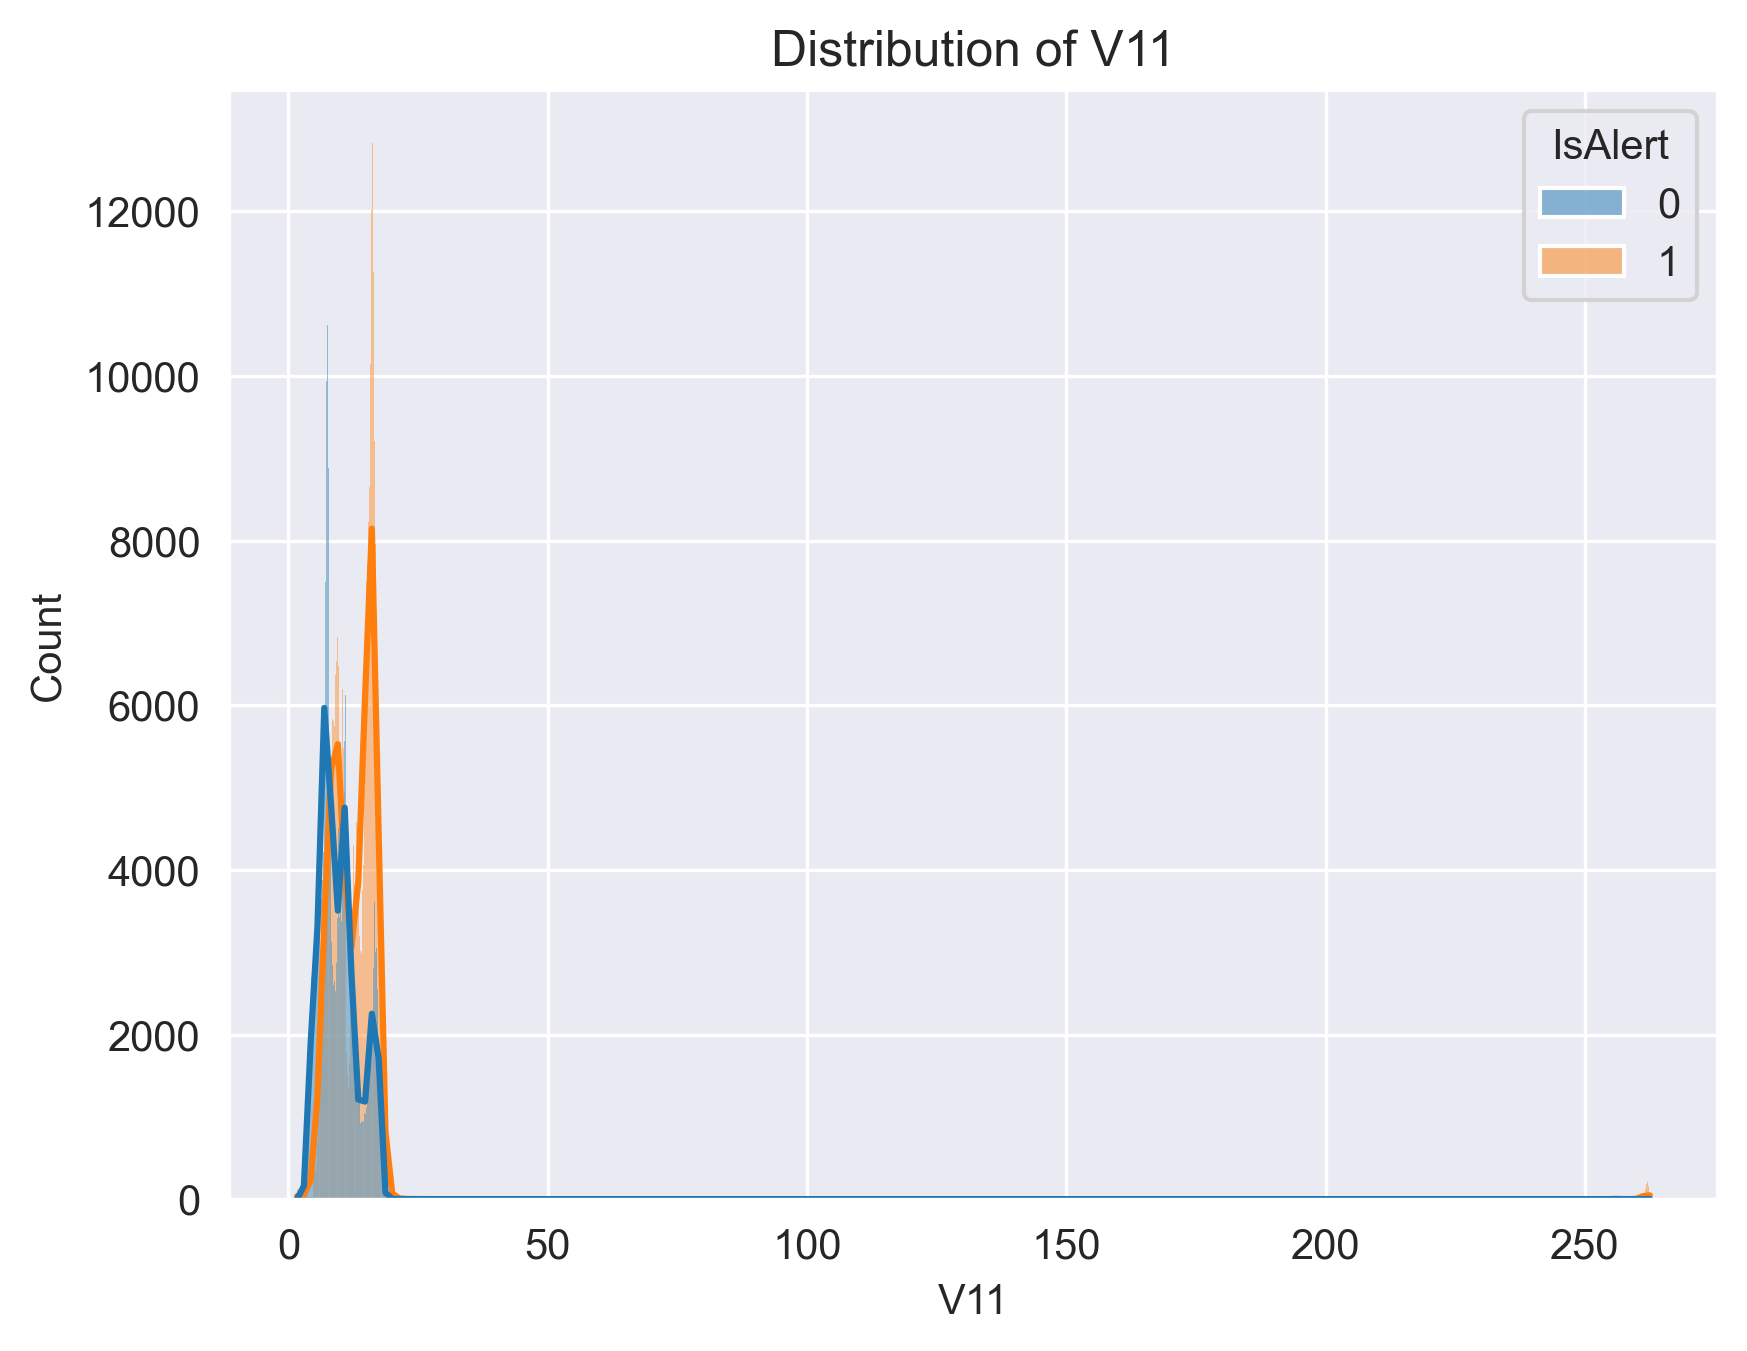

In [41]:
plt.title("Distribution of V11")
sns.histplot(data=train_df,x='V11',kde=True,hue='IsAlert')
outlier(train_df.V11)

**V11's distribution is almost exactly uniformly right-skewed with 0.16% outliers.**

# Input/Target cols

In [42]:
input_cols = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6',
              'P7', 'P8', 'E1', 'E2', 'E3', 'E4', 
              'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
              'E11', 'V1', 'V2', 'V3', 'V4', 'V5', 
              'V6', 'V7', 'V8', 'V9', 'V10','V11']

target_cols = 'IsAlert'
inputs = train_df[input_cols]
targets = train_df[target_cols]
test_inputs = test_df[input_cols]

## Scaling of Values
### As some columns of in dataframe contains outliers so I will use RobustScaler as It is effective when the data contains outliers 

In [43]:
scaler = RobustScaler()
scaler.fit(train_df[input_cols])
inputs[input_cols] = scaler.transform(inputs[input_cols])

C:\Users\Arsh\AppData\Local\Temp\ipykernel_8172\2377164612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs[input_cols] = scaler.transform(inputs[input_cols])


# Training Models

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

In [44]:
def check_accuracy(train_inputs,val_inputs,train_targets,val_targets):
    model.fit(train_inputs,train_targets)
    train_pred = model.predict(train_inputs)
    val_pred = model.predict(val_inputs)
    train_accuracy = accuracy_score(train_targets,train_pred)
    train_roc_auc = roc_auc_score(train_targets,train_pred)
    val_accuracy=accuracy_score(val_targets,val_pred)
    val_roc_auc = roc_auc_score(val_targets,val_pred)
    print("Accuracy Score on Train is {}".format(train_accuracy))
    print("Roc Auc Score on Train is {}".format(train_roc_auc))
    print("Accuracy Score on Validation is {}".format(val_accuracy))
    print("Roc Auc Score on Validation is {}".format(val_roc_auc))
    print("Classification Report \n",classification_report(train_targets,train_pred))
    label = ['Yes','No']
    cm = confusion_matrix(train_targets,train_pred,labels=(1,0),normalize='true')
    sns.heatmap(cm,annot=True,cmap='plasma',fmt = '0.1f',xticklabels=label,yticklabels=label)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix For Training data")
    plt.show()

In [45]:
train_inputs,val_inputs,train_targets,val_targets = train_test_split(inputs,targets,random_state=42,train_size=0.8)

## Decision Trees

In [46]:
def test_Parameters_DT(**params):
    model = DecisionTreeClassifier(random_state=42,**params)
    model.fit(train_inputs,train_targets)
    train_pred = model.predict(train_inputs)
    val_pred = model.predict(val_inputs)
    train_accuracy = accuracy_score(train_targets,train_pred)
    train_roc_auc = roc_auc_score(train_targets,train_pred)
    val_accuracy=accuracy_score(val_targets,val_pred)
    val_roc_auc = roc_auc_score(val_targets,val_pred)
    print("Accuracy Score on Train is {}".format(train_accuracy))
    print("Roc Auc Score on Train is {}".format(train_roc_auc))
    print("Accuracy Score on Validation is {}".format(val_accuracy))
    print("Roc Auc Score on Validation is {}".format(val_roc_auc))

Accuracy Score on Train is 0.7613881517303289
Roc Auc Score on Train is 0.7473606528283092
Accuracy Score on Validation is 0.7619926199261993
Roc Auc Score on Validation is 0.7481133643605077
Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.66      0.70    203566
           1       0.77      0.84      0.80    279897

    accuracy                           0.76    483463
   macro avg       0.76      0.75      0.75    483463
weighted avg       0.76      0.76      0.76    483463



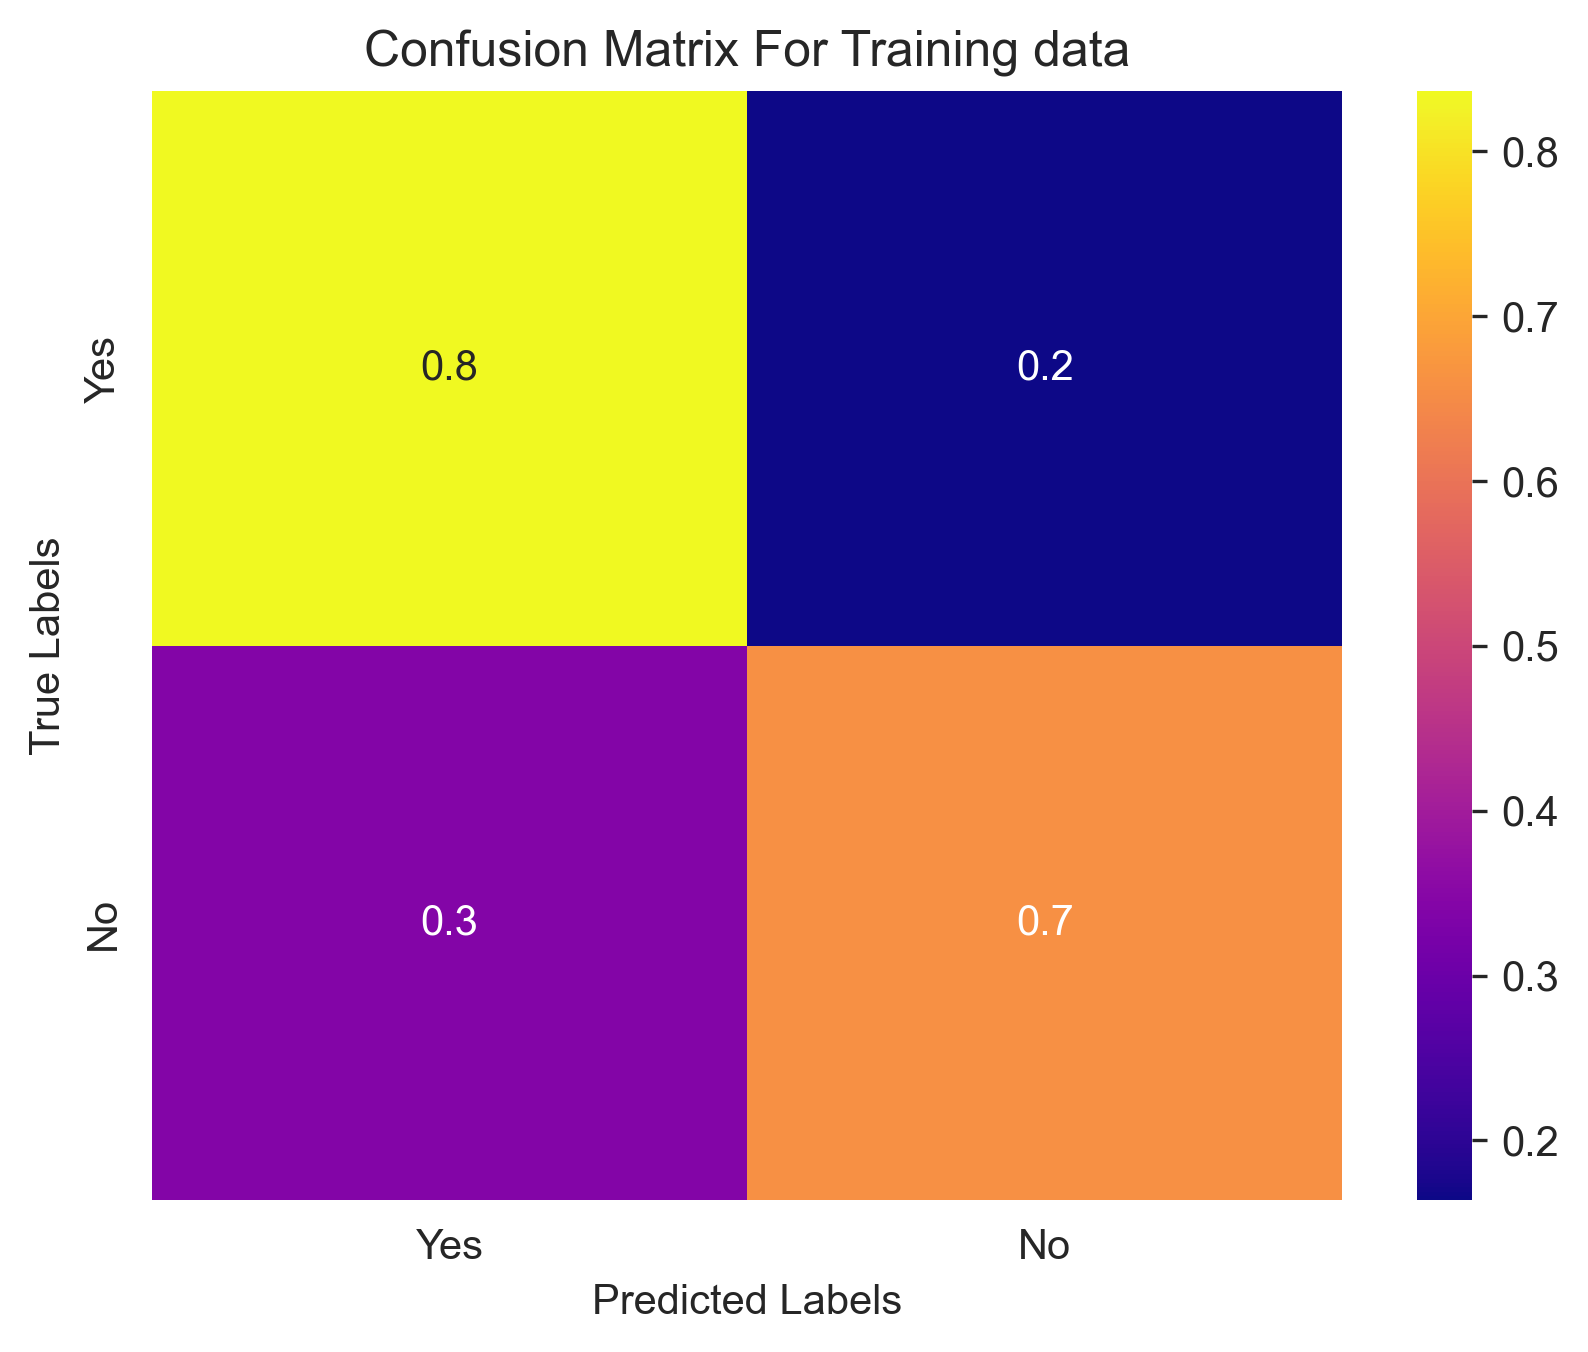

CPU times: total: 2.75 s
Wall time: 3.54 s


In [47]:
%%time
model = DecisionTreeClassifier(max_depth=2,min_samples_split=0.1,min_samples_leaf=0.1,random_state=42)
check_accuracy(train_inputs,val_inputs,train_targets,val_targets)

###  Hyperparameter Tuning in Decision Tree 

In [48]:
test_Parameters_DT(max_depth=8)

Accuracy Score on Train is 0.892593642119459
Roc Auc Score on Train is 0.8813627174837569
Accuracy Score on Validation is 0.8914086674499032
Roc Auc Score on Validation is 0.8801345058220726


In [49]:
test_Parameters_DT(max_depth=10)

Accuracy Score on Train is 0.9185439216651533
Roc Auc Score on Train is 0.9108928637942845
Accuracy Score on Validation is 0.9172223785018119
Roc Auc Score on Validation is 0.9095762099380083


In [50]:
test_Parameters_DT(max_depth=15)

Accuracy Score on Train is 0.95972390855143
Roc Auc Score on Train is 0.954276709653411
Accuracy Score on Validation is 0.9546688067777539
Roc Auc Score on Validation is 0.9489123269117059


In [51]:
test_Parameters_DT(max_depth=20,min_samples_split=0.1)

Accuracy Score on Train is 0.8096731290708906
Roc Auc Score on Train is 0.8033981735463367
Accuracy Score on Validation is 0.8083662899409263
Roc Auc Score on Validation is 0.8020079429845807


In [52]:
test_Parameters_DT(max_depth=8,min_samples_split=0.01)

Accuracy Score on Train is 0.873181608520197
Roc Auc Score on Train is 0.861289309480114
Accuracy Score on Validation is 0.872346234673109
Roc Auc Score on Validation is 0.860431871099463


In [53]:
test_Parameters_DT(max_depth=8,min_samples_split=0.001)

Accuracy Score on Train is 0.8906555413754517
Roc Auc Score on Train is 0.8793003834957049
Accuracy Score on Validation is 0.8893237138649414
Roc Auc Score on Validation is 0.8779415054761466


In [54]:
test_Parameters_DT(max_depth=30,min_samples_split=0.001,min_samples_leaf=0.001,ccp_alpha=0.1)

Accuracy Score on Train is 0.57894192523523
Roc Auc Score on Train is 0.5
Accuracy Score on Validation is 0.5782271275627554
Roc Auc Score on Validation is 0.5


In [55]:
test_Parameters_DT(max_depth=30,min_samples_split=0.001,min_samples_leaf=0.001,ccp_alpha=0.0001)

Accuracy Score on Train is 0.9102413214661722
Roc Auc Score on Train is 0.9043841653549618
Accuracy Score on Validation is 0.9095113596875879
Roc Auc Score on Validation is 0.9037735531960063


## Random Forest

In [56]:
def test_Parameters_RF(**params):
    model = RandomForestClassifier(random_state=42,n_jobs=-1,**params)
    model.fit(train_inputs,train_targets)
    train_pred = model.predict(train_inputs)
    val_pred = model.predict(val_inputs)
    train_accuracy = accuracy_score(train_targets,train_pred)
    train_roc_auc = roc_auc_score(train_targets,train_pred)
    val_accuracy=accuracy_score(val_targets,val_pred)
    val_roc_auc = roc_auc_score(val_targets,val_pred)
    print("Accuracy Score on Train is {}".format(train_accuracy))
    print("Roc Auc Score on Train is {}".format(train_roc_auc))
    print("Accuracy Score on Validation is {}".format(val_accuracy))
    print("Roc Auc Score on Validation is {}".format(val_roc_auc))

Accuracy Score on Train is 0.7092331781335903
Roc Auc Score on Train is 0.665565491676313
Accuracy Score on Validation is 0.7081809607333741
Roc Auc Score on Validation is 0.6648684307069113
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.39      0.53    203566
           1       0.68      0.94      0.79    279897

    accuracy                           0.71    483463
   macro avg       0.75      0.67      0.66    483463
weighted avg       0.74      0.71      0.68    483463



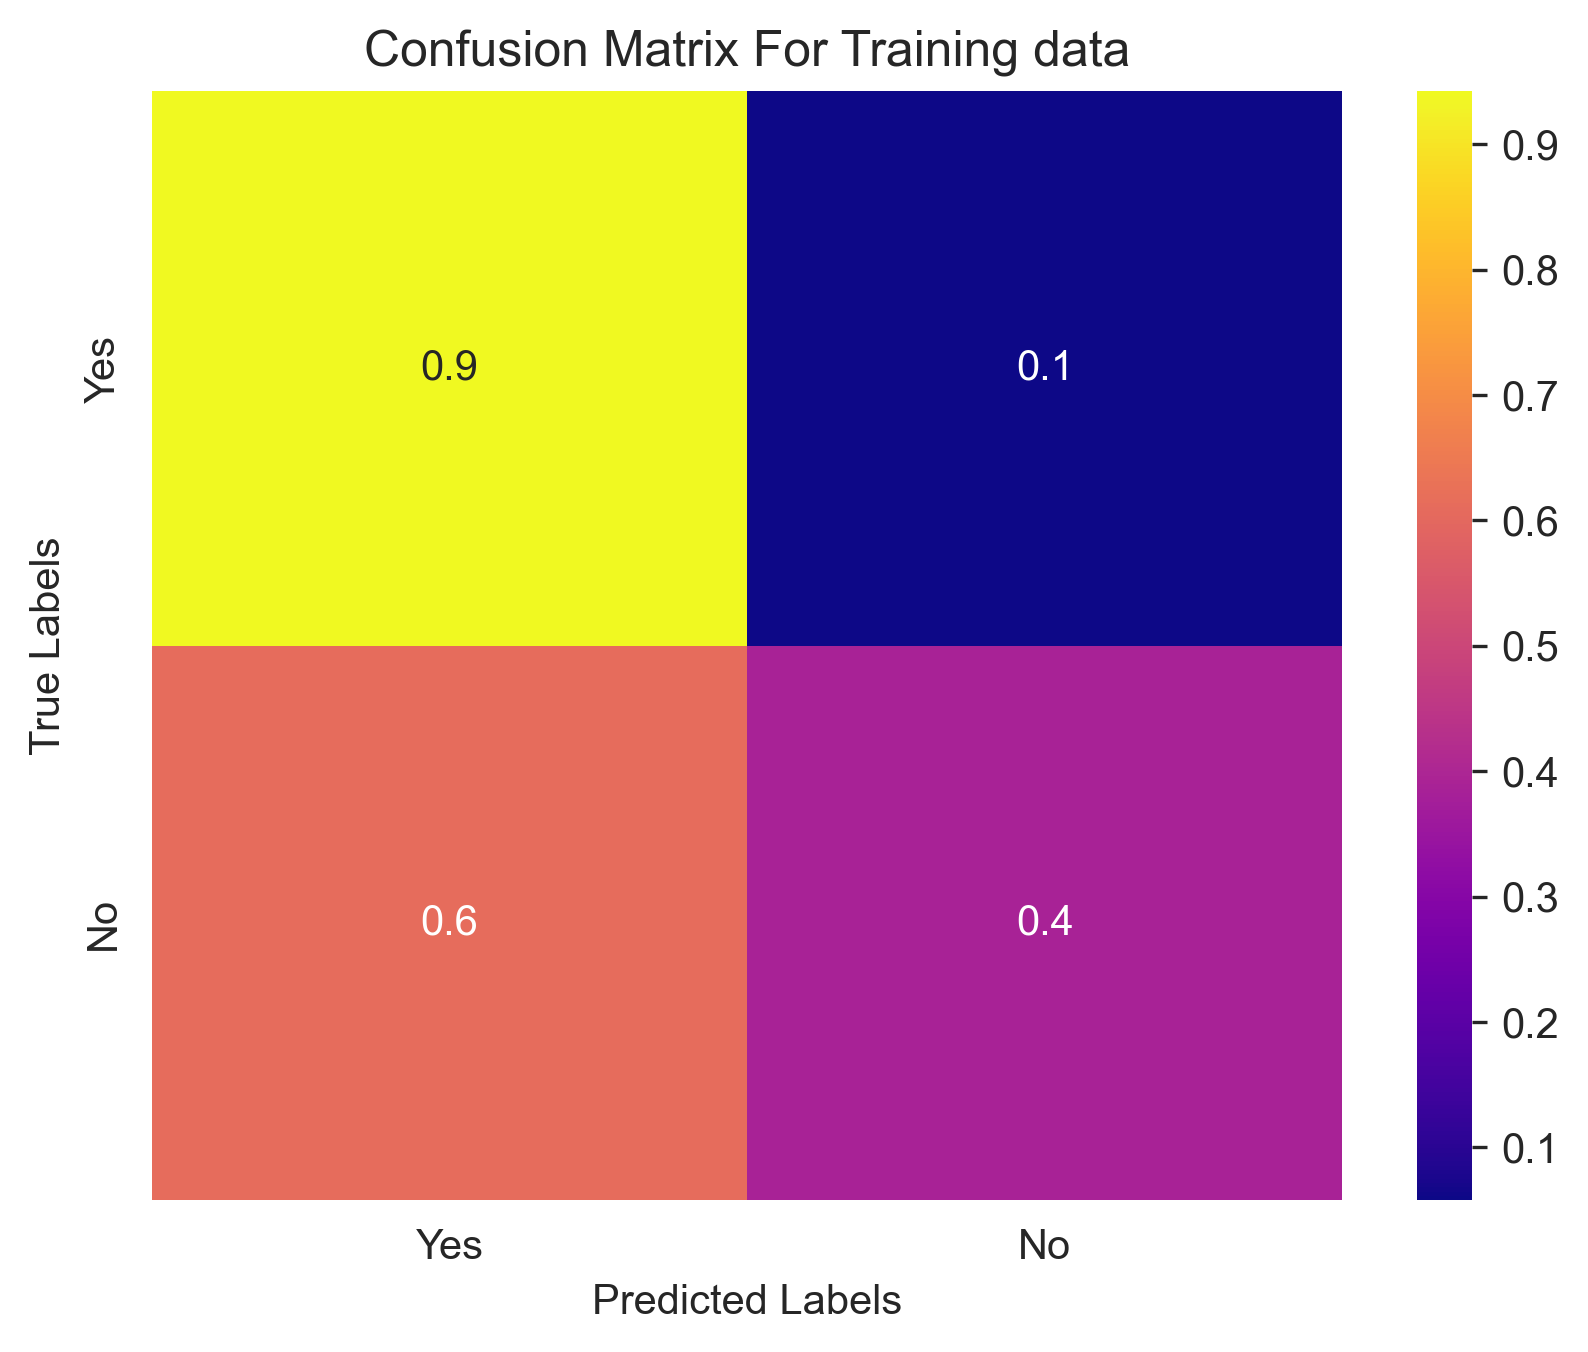

CPU times: total: 2.61 s
Wall time: 3.93 s


In [57]:
%%time
model = RandomForestClassifier(n_estimators=10,max_depth=4,min_samples_leaf=0.1,min_samples_split=0.5,random_state=42)
check_accuracy(train_inputs,val_inputs,train_targets,val_targets)

###  Hyperparameter Tuning in Random Forest

In [58]:
test_Parameters_RF(n_estimators=100,max_depth=7)

Accuracy Score on Train is 0.8755706227777513
Roc Auc Score on Train is 0.861550713835862
Accuracy Score on Validation is 0.8748283222742541
Roc Auc Score on Validation is 0.8607655837779157


In [59]:
test_Parameters_RF(n_estimators=50,max_depth=4)

Accuracy Score on Train is 0.8458806568444741
Roc Auc Score on Train is 0.830751413396438
Accuracy Score on Validation is 0.8447702414243874
Roc Auc Score on Validation is 0.829636146529739


In [60]:
test_Parameters_RF(n_estimators=300,max_depth=5,min_samples_leaf=0.1)

Accuracy Score on Train is 0.7894688942070024
Roc Auc Score on Train is 0.7683322519353033
Accuracy Score on Validation is 0.7889977330266577
Roc Auc Score on Validation is 0.7681768944118788


In [61]:
test_Parameters_RF(n_estimators=500,max_depth=5,min_samples_leaf=0.001)

Accuracy Score on Train is 0.8514095184119571
Roc Auc Score on Train is 0.836245786371919
Accuracy Score on Validation is 0.8509175450498899
Roc Auc Score on Validation is 0.8358222567338357


In [62]:
test_Parameters_RF(n_estimators=500,max_depth=5,min_samples_leaf=5000,min_samples_split=0.001)

Accuracy Score on Train is 0.847940793814625
Roc Auc Score on Train is 0.8326297748222824
Accuracy Score on Validation is 0.8474012542816011
Roc Auc Score on Validation is 0.8321872154557945


In [63]:
test_Parameters_RF(n_estimators=700,max_depth=10,min_samples_leaf=0.001,min_samples_split=0.01)

Accuracy Score on Train is 0.8763235242407382
Roc Auc Score on Train is 0.8624668773014914
Accuracy Score on Validation is 0.8755067595519005
Roc Auc Score on Validation is 0.8616123138620129


In [64]:
test_Parameters_RF(n_estimators=1000,max_depth = 7,min_samples_leaf=2500,min_samples_split=6000 )

Accuracy Score on Train is 0.8627299296947233
Roc Auc Score on Train is 0.8489558021159825
Accuracy Score on Validation is 0.8621779491337515
Roc Auc Score on Validation is 0.8483166131165789


## XgBoost

In [65]:
def test_Parameters_XG(**params):
    model = XGBClassifier(random_state=42,n_jobs=-1,**params)
    model.fit(train_inputs,train_targets)
    train_pred = model.predict(train_inputs)
    val_pred = model.predict(val_inputs)
    train_accuracy = accuracy_score(train_targets,train_pred)
    train_roc_auc = roc_auc_score(train_targets,train_pred)
    val_accuracy=accuracy_score(val_targets,val_pred)
    val_roc_auc = roc_auc_score(val_targets,val_pred)
    print("Accuracy Score on Train is {}".format(train_accuracy))
    print("Roc Auc Score on Train is {}".format(train_roc_auc))
    print("Accuracy Score on Validation is {}".format(val_accuracy))
    print("Roc Auc Score on Validation is {}".format(val_roc_auc))

Accuracy Score on Train is 0.9556739605719569
Roc Auc Score on Train is 0.9504621627349324
Accuracy Score on Validation is 0.9530471762116725
Roc Auc Score on Validation is 0.9475764295346394
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95    203566
           1       0.94      0.98      0.96    279897

    accuracy                           0.96    483463
   macro avg       0.96      0.95      0.95    483463
weighted avg       0.96      0.96      0.96    483463



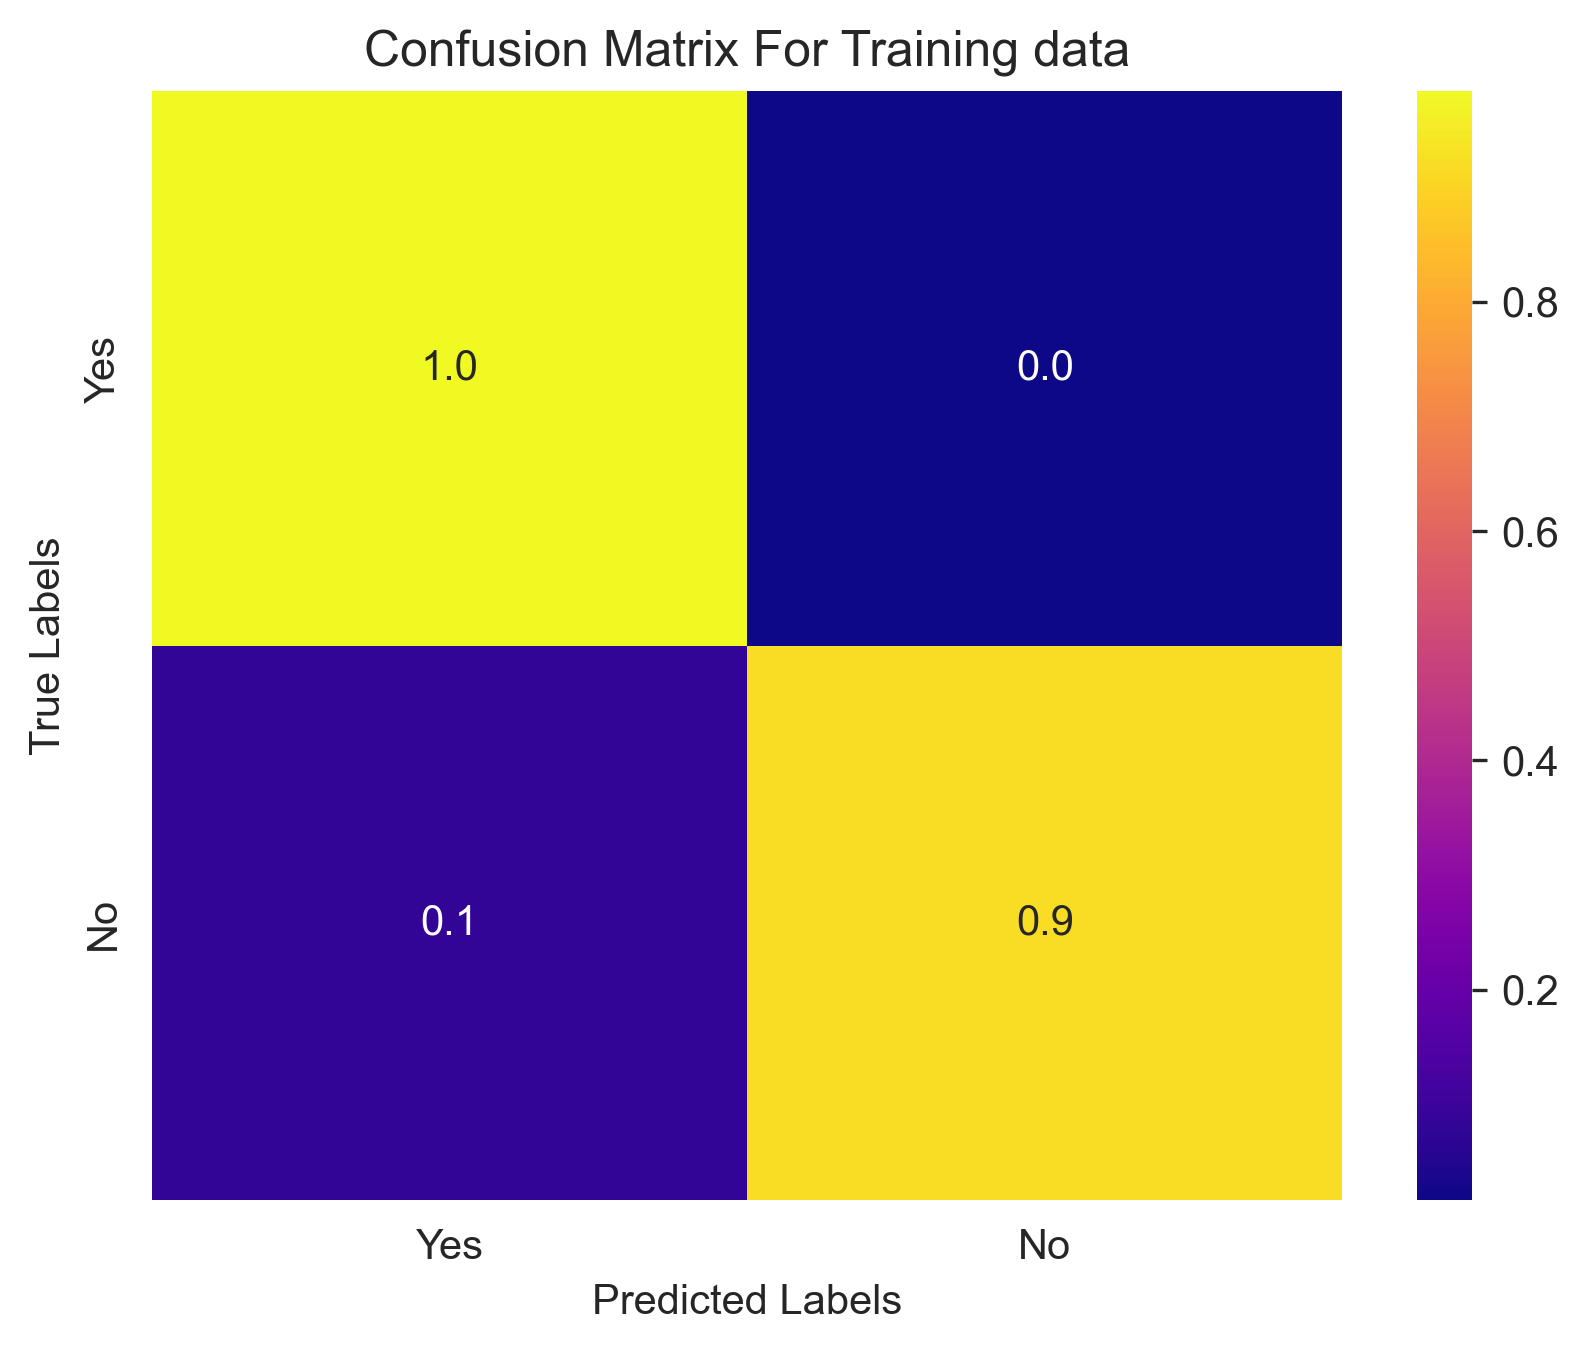

CPU times: total: 5min 4s
Wall time: 28.2 s


In [66]:
%%time
model = XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.5,random_state=42)
check_accuracy(train_inputs,val_inputs,train_targets,val_targets)

###  Hyperparameter Tuning in XgBoost

In [67]:
test_Parameters_XG(n_estimators=200,max_depth=5,learning_rate=0.7)

Accuracy Score on Train is 0.9729989678631044
Roc Auc Score on Train is 0.9695168282690052
Accuracy Score on Validation is 0.9669634140287591
Roc Auc Score on Validation is 0.9630175103950249


In [68]:
test_Parameters_XG(n_estimators=400,max_depth=7,learning_rate=0.9)

Accuracy Score on Train is 1.0
Roc Auc Score on Train is 1.0
Accuracy Score on Validation is 0.9931411645955025
Roc Auc Score on Validation is 0.9923573496726377


In [69]:
test_Parameters_XG(n_estimators=400,max_depth=7,learning_rate=0.9,booster='gblinear')

[10:04:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

Accuracy Score on Train is 0.7903438318961327
Roc Auc Score on Train is 0.779442187732444
Accuracy Score on Validation is 0.7895106977975609
Roc Auc Score on Validation is 0.7789173934691823


In [70]:
test_Parameters_XG(n_estimators=400,max_depth=7,learning_rate=0.9,booster='gbtree',max_leaves=100)

Accuracy Score on Train is 1.0
Roc Auc Score on Train is 1.0
Accuracy Score on Validation is 0.9931411645955025
Roc Auc Score on Validation is 0.9923573496726377


# Training Final Model and Comparing Models

In [71]:
%%time
dt_model = DecisionTreeClassifier(max_depth=30,min_samples_split=0.001,min_samples_leaf=0.001,ccp_alpha=0.0001,random_state=42)
dt_model.fit(train_inputs,train_targets)

CPU times: total: 8.73 s
Wall time: 8.76 s


DecisionTreeClassifier(ccp_alpha=0.0001, max_depth=30, min_samples_leaf=0.001,
                       min_samples_split=0.001, random_state=42)

In [72]:
%%time
rf_model = RandomForestClassifier(n_estimators=700,max_depth=10,min_samples_leaf=0.001,min_samples_split=0.01,random_state=42,n_jobs=-1)
rf_model.fit(train_inputs,train_targets)

CPU times: total: 29min 27s
Wall time: 2min 32s


RandomForestClassifier(max_depth=10, min_samples_leaf=0.001,
                       min_samples_split=0.01, n_estimators=700, n_jobs=-1,
                       random_state=42)

In [73]:
%%time
xg_model = XGBClassifier(n_estimators=400,max_depth=7,learning_rate=0.9,booster='gbtree',max_leaves=100,random_state=42,n_jobs=-1)
xg_model.fit(train_inputs,train_targets)

CPU times: total: 29min 45s
Wall time: 2min 37s


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=100,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [74]:
fpr_dt_train,tpr_dt_train,thresholds =roc_curve(train_targets,dt_model.predict_proba(train_inputs)[:,1])
fpr_dt_val,tpr_dt_val,thresholds =roc_curve(val_targets,dt_model.predict_proba(val_inputs)[:,1])


fpr_rf_train,tpr_rf_train,thresholds =roc_curve(train_targets,rf_model.predict_proba(train_inputs)[:,1])
fpr_rf_val,tpr_rf_val,thresholds =roc_curve(val_targets,rf_model.predict_proba(val_inputs)[:,1])


fpr_xg_train,tpr_xg_train,thresholds =roc_curve(train_targets,xg_model.predict_proba(train_inputs)[:,1])
fpr_xg_val,tpr_xg_val,thresholds =roc_curve(val_targets,xg_model.predict_proba(val_inputs)[:,1])

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(26, 11))

axes[0].plot(fpr_dt_train, tpr_dt_train, label='Train')
axes[0].plot(fpr_dt_val, tpr_dt_val, label='Validation')
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TRP")
axes[0].plot([0, 1])
axes[0].legend()
axes[0].set_title("Decision Tree")

axes[1].plot(fpr_rf_train, tpr_rf_train, label='Train')
axes[1].plot(fpr_rf_val, tpr_rf_val, label='Validation')
axes[1].set_xlabel("FPR")
axes[1].set_ylabel("TRP")
axes[1].plot([0, 1])
axes[1].legend()
axes[1].set_title("Random Forest")

axes[2].plot(fpr_xg_train, tpr_xg_train, label='Train')
axes[2].plot(fpr_xg_val, tpr_xg_val, label='Validation')
axes[2].set_xlabel("FPR")
axes[2].set_ylabel("TRP")
axes[2].plot([0, 1])
axes[2].legend()
axes[2].set_title("XGBoost")

fig.suptitle("ROC AUC Curves")
plt.rcParams['font.size']=60
fig.set_dpi(1000.0)
plt.tight_layout()
plt.show()

**We choose Xgboost as our final model since, as we can see, it exhibits the highest accuracy of all three.**

In [76]:
%%time
#Training Final Model
model = XGBClassifier(n_estimators=400,max_depth=7,learning_rate=0.9,booster='gbtree',max_leaves=100,random_state=42,n_jobs=-1)
model.fit(inputs,targets)
test_pred = model.predict(test_inputs)

CPU times: total: 26min 27s
Wall time: 2min 18s


In [77]:
singel_input_={
 'P1':27.09,
 'P2':7,
 'P3':1200,
 'P4':47.8,
 'P5':0.009,
 'P6':700,
 'P7':102.88,
 'P8':1,
 'E1':11.88,
 'E2':1.004,
 'E3':1,
 'E4':-14,
 'E5':0.0034,
 'E6':325,
 'E7':1,
 'E8':2,
 'E9':1,
 'E10':59,
 'E11':0.0,
 'V1':101,
 'V2':0.175,
 'V3':658,
 'V4':5.987,
 'V5':0.004,
 'V6':2017,
 'V7':0,
 'V8':9.8,
 'V9':0,
 'V10':4,
 'V11':14.876
    
}

In [78]:
def singel_input(inputs):
    singel_inputs = pd.DataFrame([inputs])
    singel_inputs = scaler.transform(singel_inputs)
    pred = xg_model.predict(singel_inputs)[0]
    prob = np.squeeze(xg_model.predict_proba(singel_inputs)[:,1])
    prob = np.round(prob *100,decimals=2)
    print("The Driver Is {}, and Probability of Driver been {} is {}%".format(pred,pred,prob))

In [79]:
singel_input(singel_input_)

The Driver Is 1, and Probability of Driver been 1 is 99.9%


# Summary:
**The project aims to predict whether a driver is alert or not based on various physiological, environmental, and vehicular data. Three different classifiers, namely Decision Tree, Random Forest, and XGBoost, are trained and evaluated on the dataset. The best-performing model, XGBoost, is selected as the final model for making predictions. The code includes data loading, exploratory data analysis, data preprocessing, model training, model comparison, and single input prediction**

# References:
**Dataset:** https://www.kaggle.com/competitions/stayalert/overview

**Pandas** https://pandas.pydata.org/docs/user_guide/10min.html

**XgBoost** https://xgboost.readthedocs.io/en/stable/parameter.

**Image** https://d2hucwwplm5rxi.cloudfront.net/wp-content/uploads/2023/03/15075844/driver-fatigue-detection-system-Cover-20230315.jpg


# Future Work:
**We can test this model and make additional improvements.**